In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from flipper_training.experiments.ppo.eval import get_eval_rollout, log_from_eval_rollout, PPOExperimentConfig

/Users/davidkorcak/.venv/lib/python3.12/site-packages/torchrl/__init__.py:43: UserWarning: failed to set start method to spawn, and current start method for mp is fork.
  warn(


In [2]:
eval_cfg = "../cross_eval_configs/gauss_coarse_fixed.yaml"

In [3]:
policy_a_path = "../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth"
policy_b_path = "../runs/ppo/final_mixed_objective_training_42_2025-05-18_14-51-46/weights/policy_final.pth"

In [4]:
eval_config = OmegaConf.load(eval_cfg)
eval_config["num_robots"] = 16
eval_config["objective_opts"]["cache_size"] = 10
eval_config["max_eval_steps"] = 1000
eval_config = PPOExperimentConfig(**eval_config)

In [5]:
from copy import deepcopy

config_a = deepcopy(eval_config)
config_a.policy_weights_path = Path(policy_a_path)
config_a.vecnorm_weights_path = Path(policy_a_path.replace("policy", "vecnorm"))

config_b = deepcopy(eval_config)
config_b.policy_weights_path = Path(policy_b_path)
config_b.vecnorm_weights_path = Path(policy_b_path.replace("policy", "vecnorm"))

for cfg in [config_a, config_b]:
    assert cfg.policy_weights_path.exists(), f"Policy weights not found at {cfg.policy_weights_path}"
    assert cfg.vecnorm_weights_path.exists(), f"Vecnorm weights not found at {cfg.vecnorm_weights_path}"

In [6]:
env_a, rollout_a = get_eval_rollout(config_a)
env_b, rollout_b = get_eval_rollout(config_b)

2025-05-18 21:49:01,199 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
Initializing start/goal position cache: 100%|██████████| 16/16 [00:00<00:00, 131.32it/s]
2025-05-18 21:49:01,408 [environment][INFO]: Environment: Compiling engine with options {'options': {'triton.cudagraphs': True}, 'fullgraph': True} (env.py:130)
2025-05-18 21:49:04,047 [environment][INFO]: Engine compiled successfully, testing correctness with atol=0.1, rtol=1e-06 (env.py:144)
2025-05-18 21:49:04,177 [environment][INFO]: Compiled engine passed correctness test (env.py:151)
2025-05-18 21:49:05,197 [environment][INFO]: Compiled engine takes 1.0193983340000001 ms per step (env.py:157)


                      Environment Summary                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Key ┃                                  Value ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    Number of robots │                                     16 │
│        Observations │            LocalStateVector, Heightmap │
│              Reward │ PotentialGoalWithPenaltiesConfigurable │
│           Objective │              RandomNavigationObjective │
│   Physics frequency │                              142.86 Hz │
│   Engine iters/step │                                      4 │
│ Effective frequency │                               35.71 Hz │
└─────────────────────┴────────────────────────────────────────┘

2025-05-18 21:49:07,515 [torchrl][INFO] check_env_specs succeeded!
2025-05-18 21:49:07,532 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-18 21:49:07,538 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_666_2025-05-16_19-08-25/weights/policy_final.pth (mlp_policy.py:94)


     Policy Parameter Counts     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃        Component ┃ Parameters ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│    Actor Encoder │     32,032 │
│       Actor Head │     13,456 │
│    Value Encoder │     32,032 │
│       Value Head │     12,737 │
│              --- │        --- │
│      Total Actor │     45,488 │
│      Total Value │     44,769 │
│              --- │        --- │
│ Total Parameters │     90,257 │
└──────────────────┴────────────┘

/Users/davidkorcak/.venv/lib/python3.12/site-packages/torchrl/envs/transforms/transforms.py:6500: UserWarning: VecNorm wasn't initialized and the tensordict is not shared. In single process settings, this is ok, but if you need to share the statistics between workers this should require some attention. Make sure that the content of VecNorm is transmitted to the workers after calling load_state_dict and not before, as other workers may not have access to the loaded TensorDict.
  warnings.warn(
2025-05-18 21:49:13,969 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703837d75c759b5c075158ced88ea318e932700dabb2 (robot_config.py:155)
2025-05-18 21:49:13,969 [RobotModelConfig][INFO]: Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_vx0.010_dp384_b512_whl0.02_trck0.05_eaecc2d5466de1eb8911703

                      Environment Summary                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Key ┃                                  Value ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│    Number of robots │                                     16 │
│        Observations │            LocalStateVector, Heightmap │
│              Reward │ PotentialGoalWithPenaltiesConfigurable │
│           Objective │              RandomNavigationObjective │
│   Physics frequency │                              142.86 Hz │
│   Engine iters/step │                                      4 │
│ Effective frequency │                               35.71 Hz │
└─────────────────────┴────────────────────────────────────────┘

2025-05-18 21:49:18,519 [torchrl][INFO] check_env_specs succeeded!
2025-05-18 21:49:18,529 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-18 21:49:18,529 [MLPPolicyConfig][INFO]: Applied orthogonal initialization to the actor and value operators. (mlp_policy.py:89)
2025-05-18 21:49:18,536 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_42_2025-05-18_14-51-46/weights/policy_final.pth (mlp_policy.py:94)
2025-05-18 21:49:18,536 [MLPPolicyConfig][INFO]: Loaded weights from ../runs/ppo/final_mixed_objective_training_42_2025-05-18_14-51-46/weights/policy_final.pth (mlp_policy.py:94)


     Policy Parameter Counts     
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃        Component ┃ Parameters ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│    Actor Encoder │     32,032 │
│       Actor Head │     13,456 │
│    Value Encoder │     32,032 │
│       Value Head │     12,737 │
│              --- │        --- │
│      Total Actor │     45,488 │
│      Total Value │     44,769 │
│              --- │        --- │
│ Total Parameters │     90,257 │
└──────────────────┴────────────┘

/Users/davidkorcak/.venv/lib/python3.12/site-packages/torchrl/envs/transforms/transforms.py:6500: UserWarning: VecNorm wasn't initialized and the tensordict is not shared. In single process settings, this is ok, but if you need to share the statistics between workers this should require some attention. Make sure that the content of VecNorm is transmitted to the workers after calling load_state_dict and not before, as other workers may not have access to the loaded TensorDict.
  warnings.warn(


In [7]:
rollout_a, rollout_b

(TensorDict(
     fields={
         Heightmap: Tensor(shape=torch.Size([16, 252, 1, 64, 64]), device=cpu, dtype=torch.float32, is_shared=False),
         LocalStateVector: Tensor(shape=torch.Size([16, 252, 15]), device=cpu, dtype=torch.float32, is_shared=False),
         action: Tensor(shape=torch.Size([16, 252, 8]), device=cpu, dtype=torch.float32, is_shared=False),
         curr_state: TensorDict(
             fields={
                 omega: Tensor(shape=torch.Size([16, 252, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                 q: Tensor(shape=torch.Size([16, 252, 4]), device=cpu, dtype=torch.float32, is_shared=False),
                 thetas: Tensor(shape=torch.Size([16, 252, 4]), device=cpu, dtype=torch.float32, is_shared=False),
                 x: Tensor(shape=torch.Size([16, 252, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                 xd: Tensor(shape=torch.Size([16, 252, 3]), device=cpu, dtype=torch.float32, is_shared=False)},
             b

In [8]:
states_a, states_b = rollout_a["next", "curr_state"], rollout_b["next", "curr_state"]

In [9]:
log_a = log_from_eval_rollout(rollout_a)
log_b = log_from_eval_rollout(rollout_b)
log_a["eval/pct_succeeded"], log_b["eval/pct_succeeded"]

(1.0, 0.9375)

In [11]:
states_a, states_b

(TensorDict(
     fields={
         omega: Tensor(shape=torch.Size([16, 252, 3]), device=cpu, dtype=torch.float32, is_shared=False),
         q: Tensor(shape=torch.Size([16, 252, 4]), device=cpu, dtype=torch.float32, is_shared=False),
         thetas: Tensor(shape=torch.Size([16, 252, 4]), device=cpu, dtype=torch.float32, is_shared=False),
         x: Tensor(shape=torch.Size([16, 252, 3]), device=cpu, dtype=torch.float32, is_shared=False),
         xd: Tensor(shape=torch.Size([16, 252, 3]), device=cpu, dtype=torch.float32, is_shared=False)},
     batch_size=torch.Size([16, 252]),
     device=cpu,
     is_shared=False),
 TensorDict(
     fields={
         omega: Tensor(shape=torch.Size([16, 361, 3]), device=cpu, dtype=torch.float32, is_shared=False),
         q: Tensor(shape=torch.Size([16, 361, 4]), device=cpu, dtype=torch.float32, is_shared=False),
         thetas: Tensor(shape=torch.Size([16, 361, 4]), device=cpu, dtype=torch.float32, is_shared=False),
         x: Tensor(shape=torch.

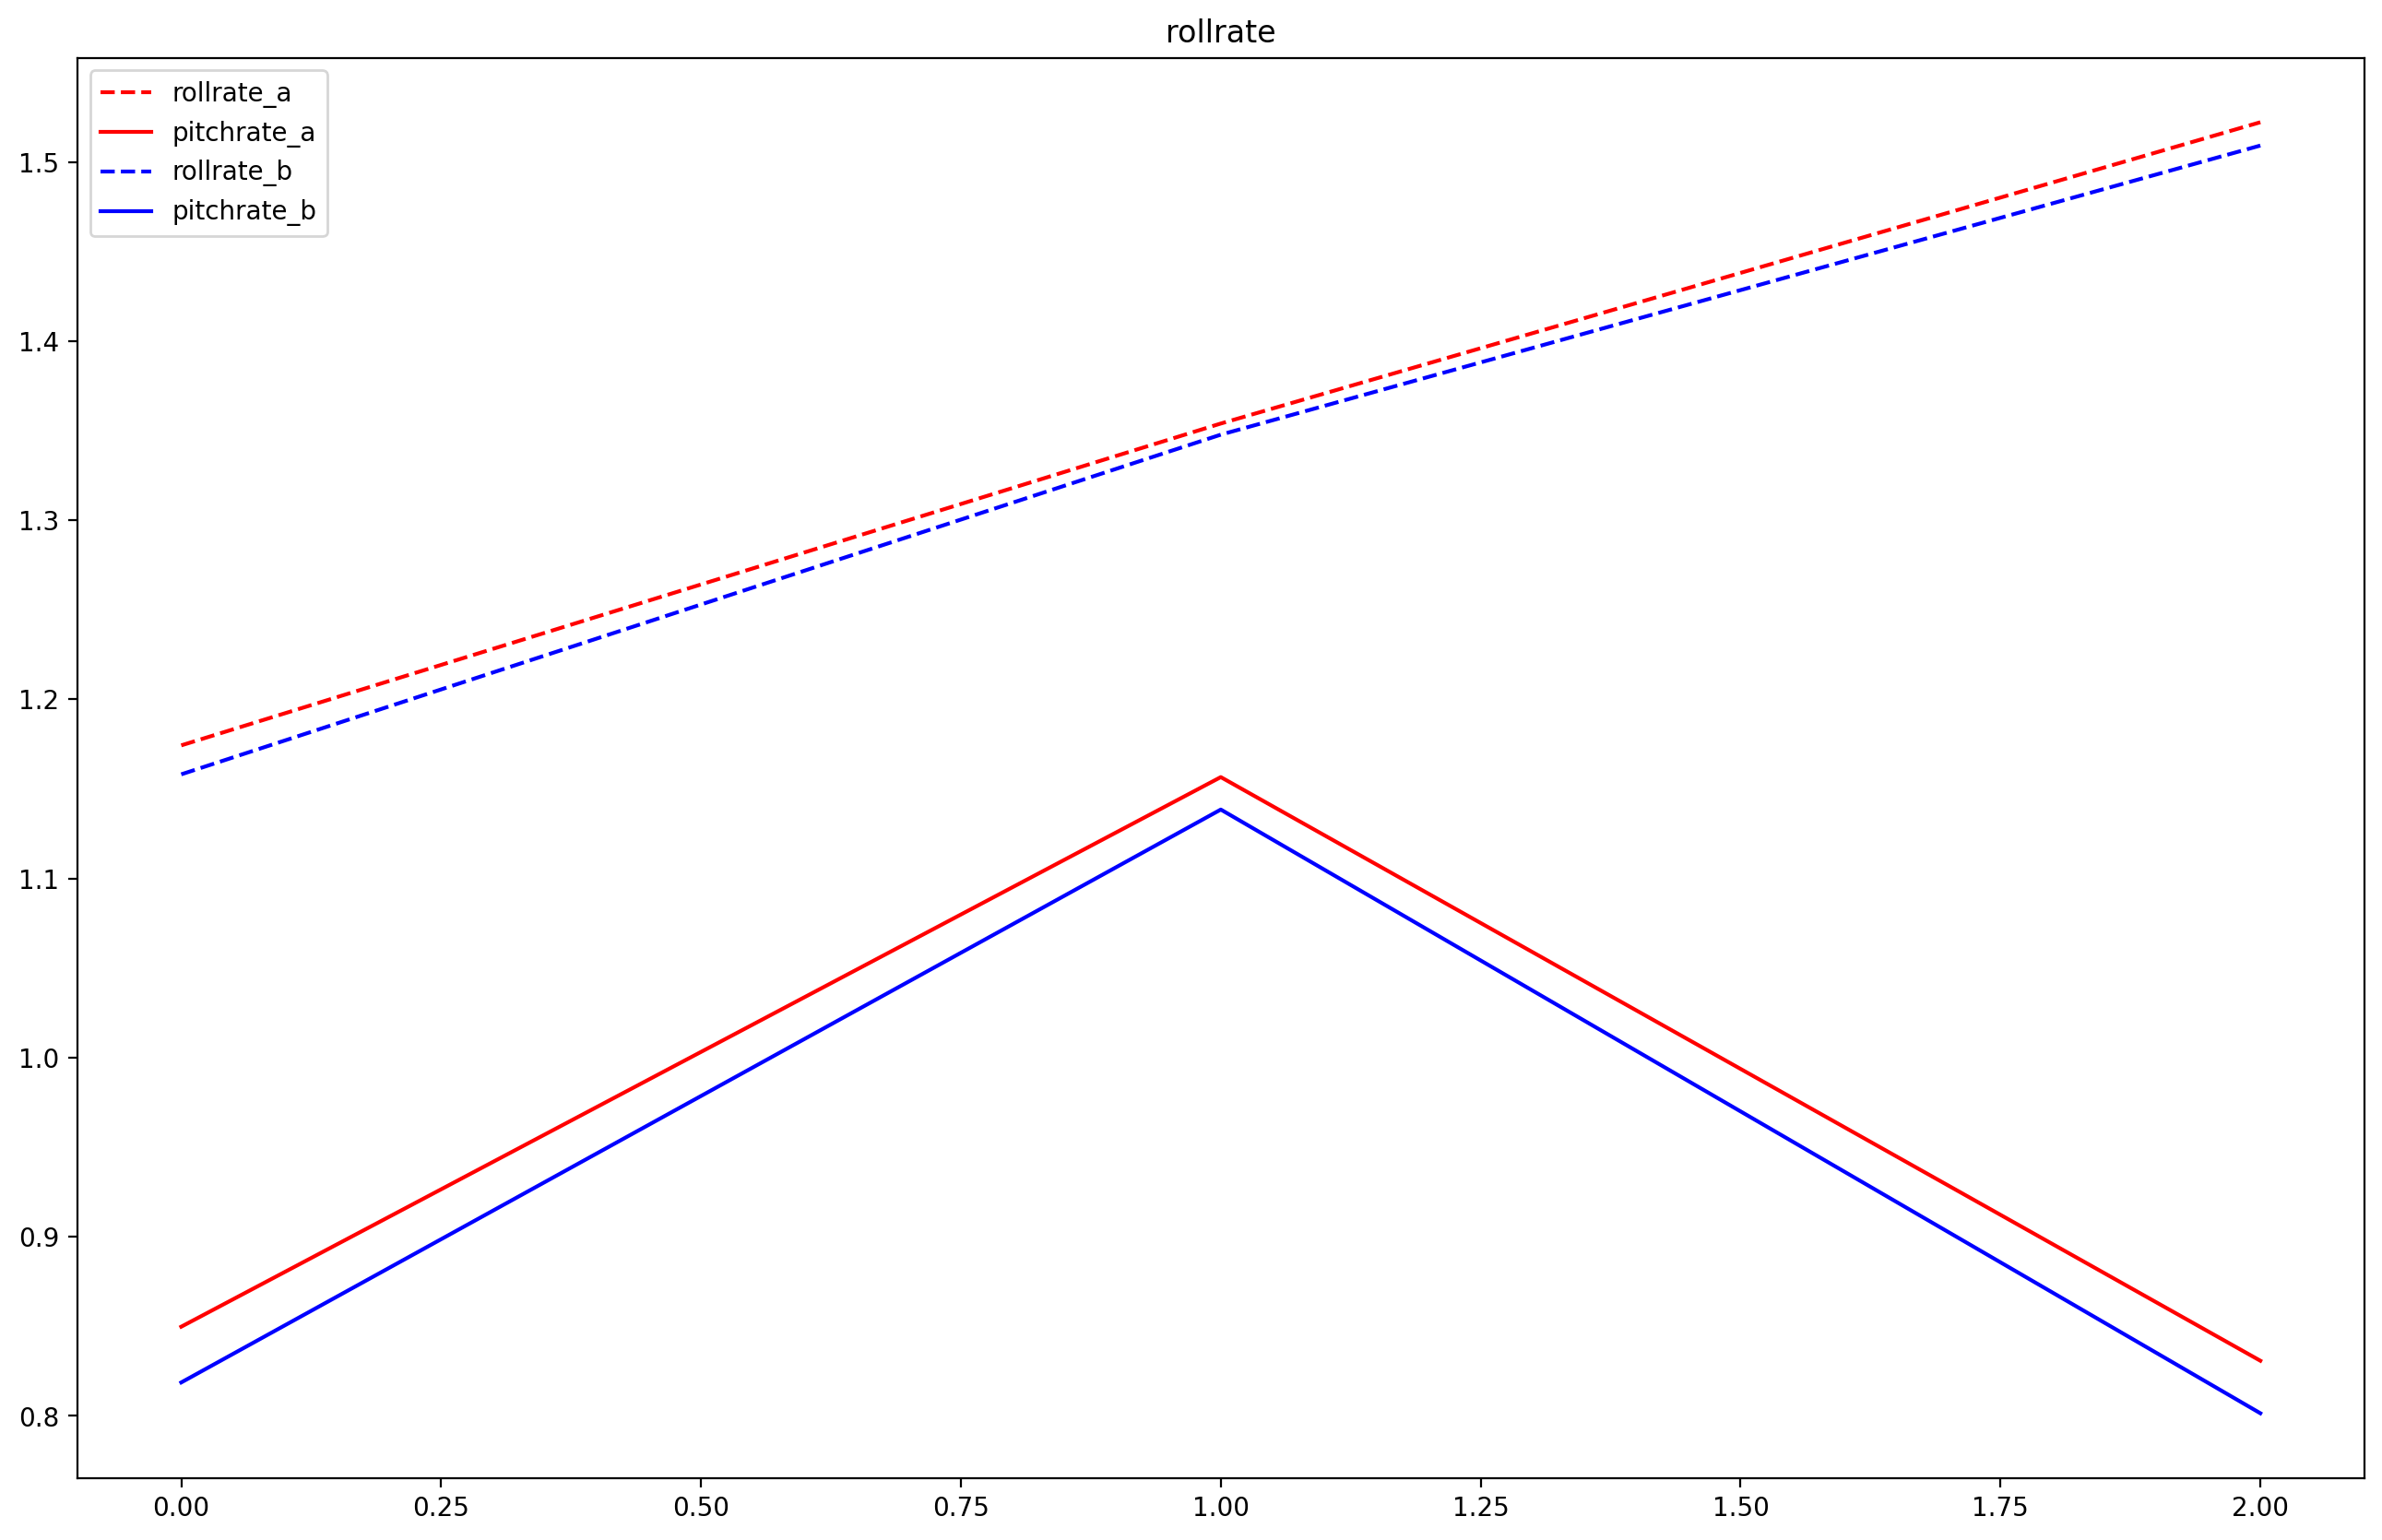

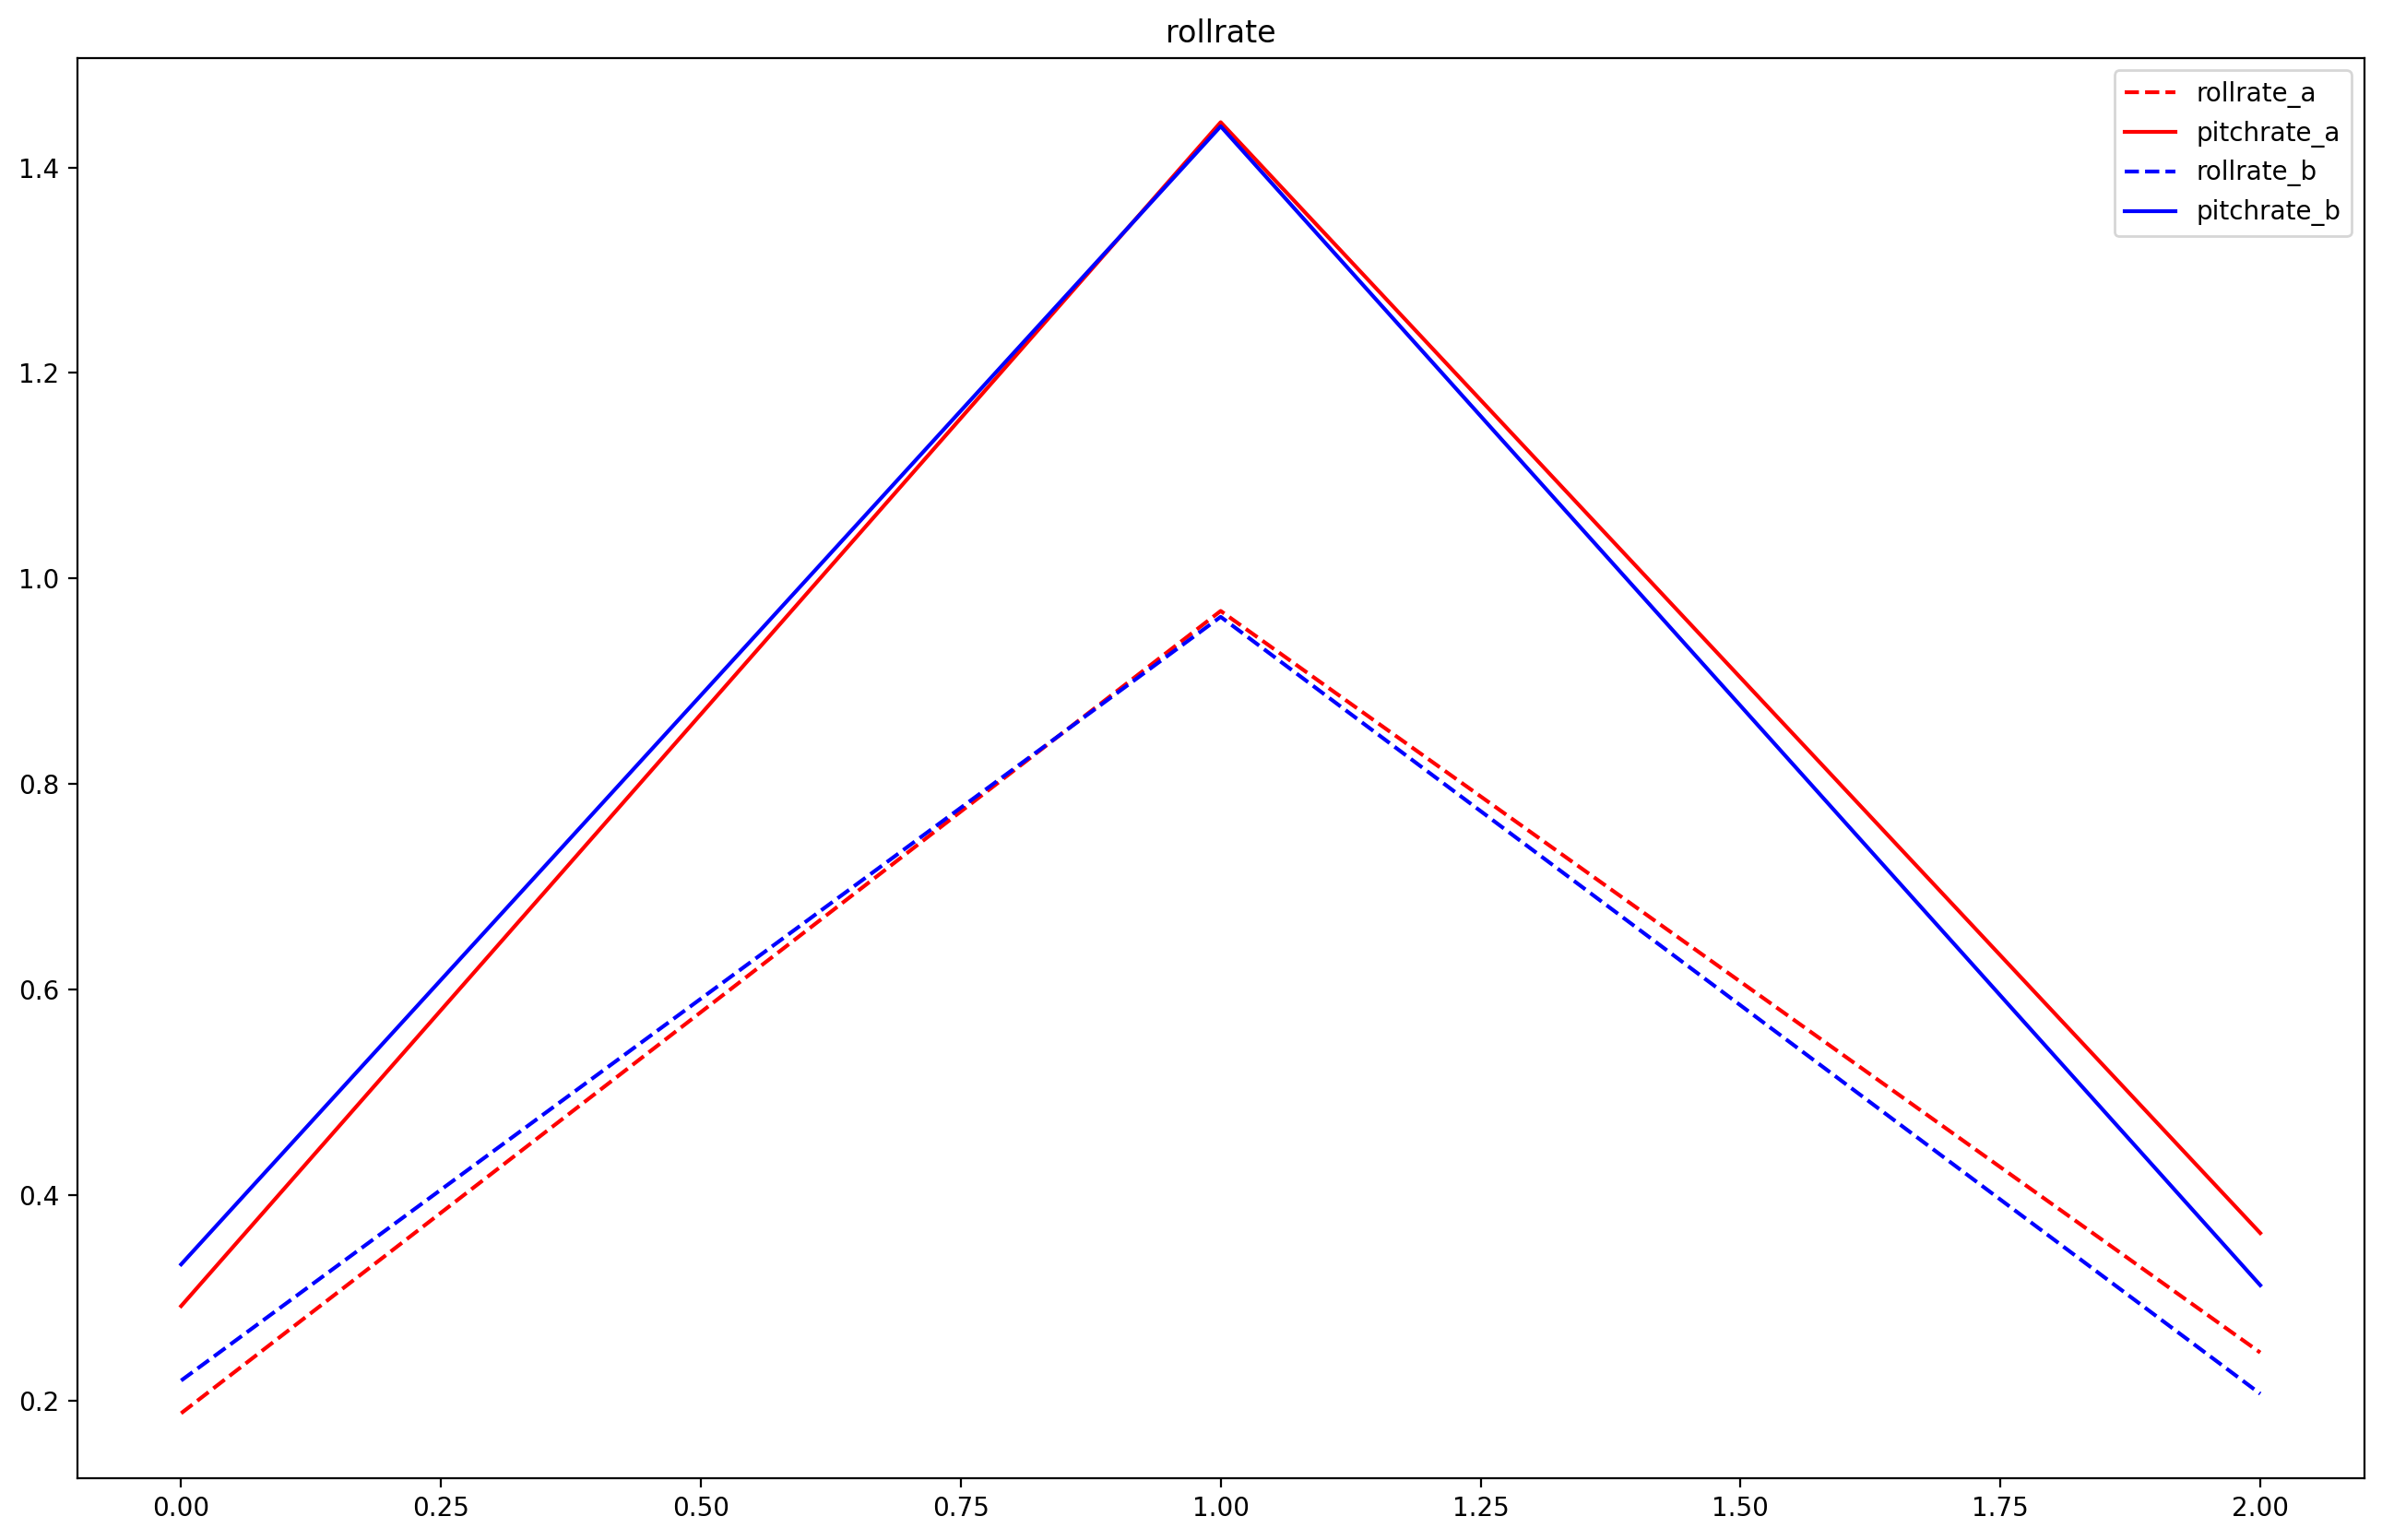

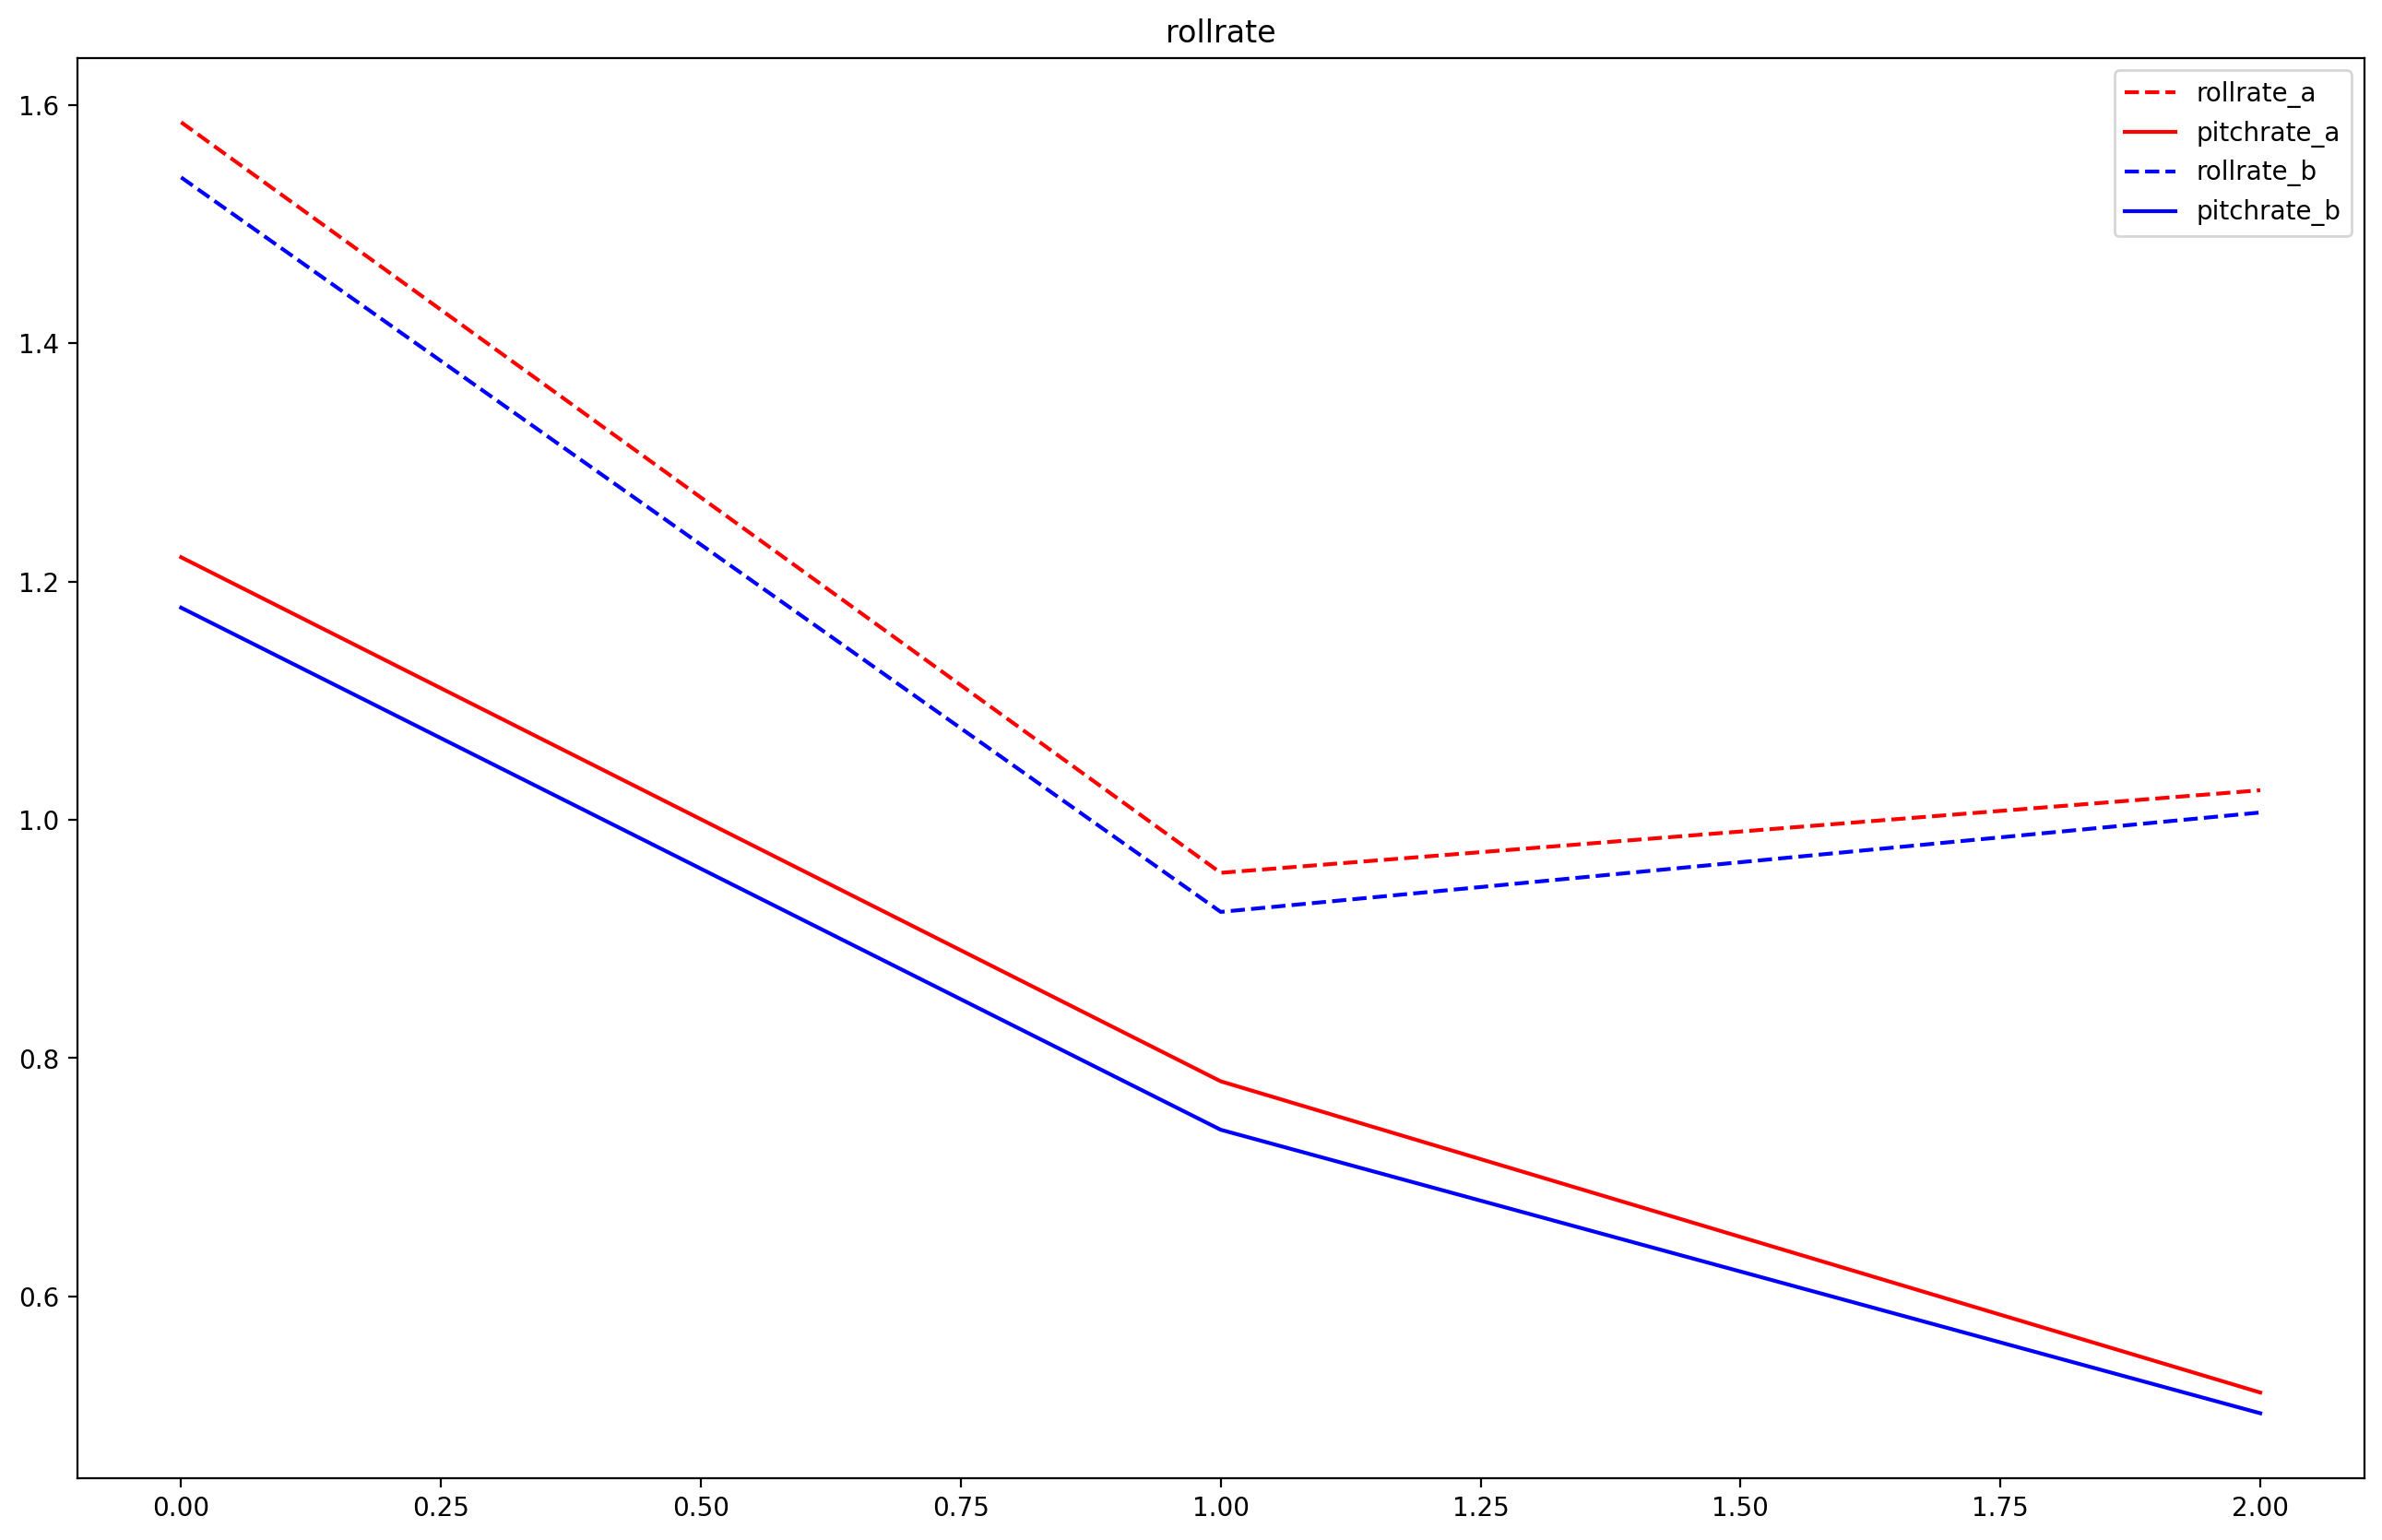

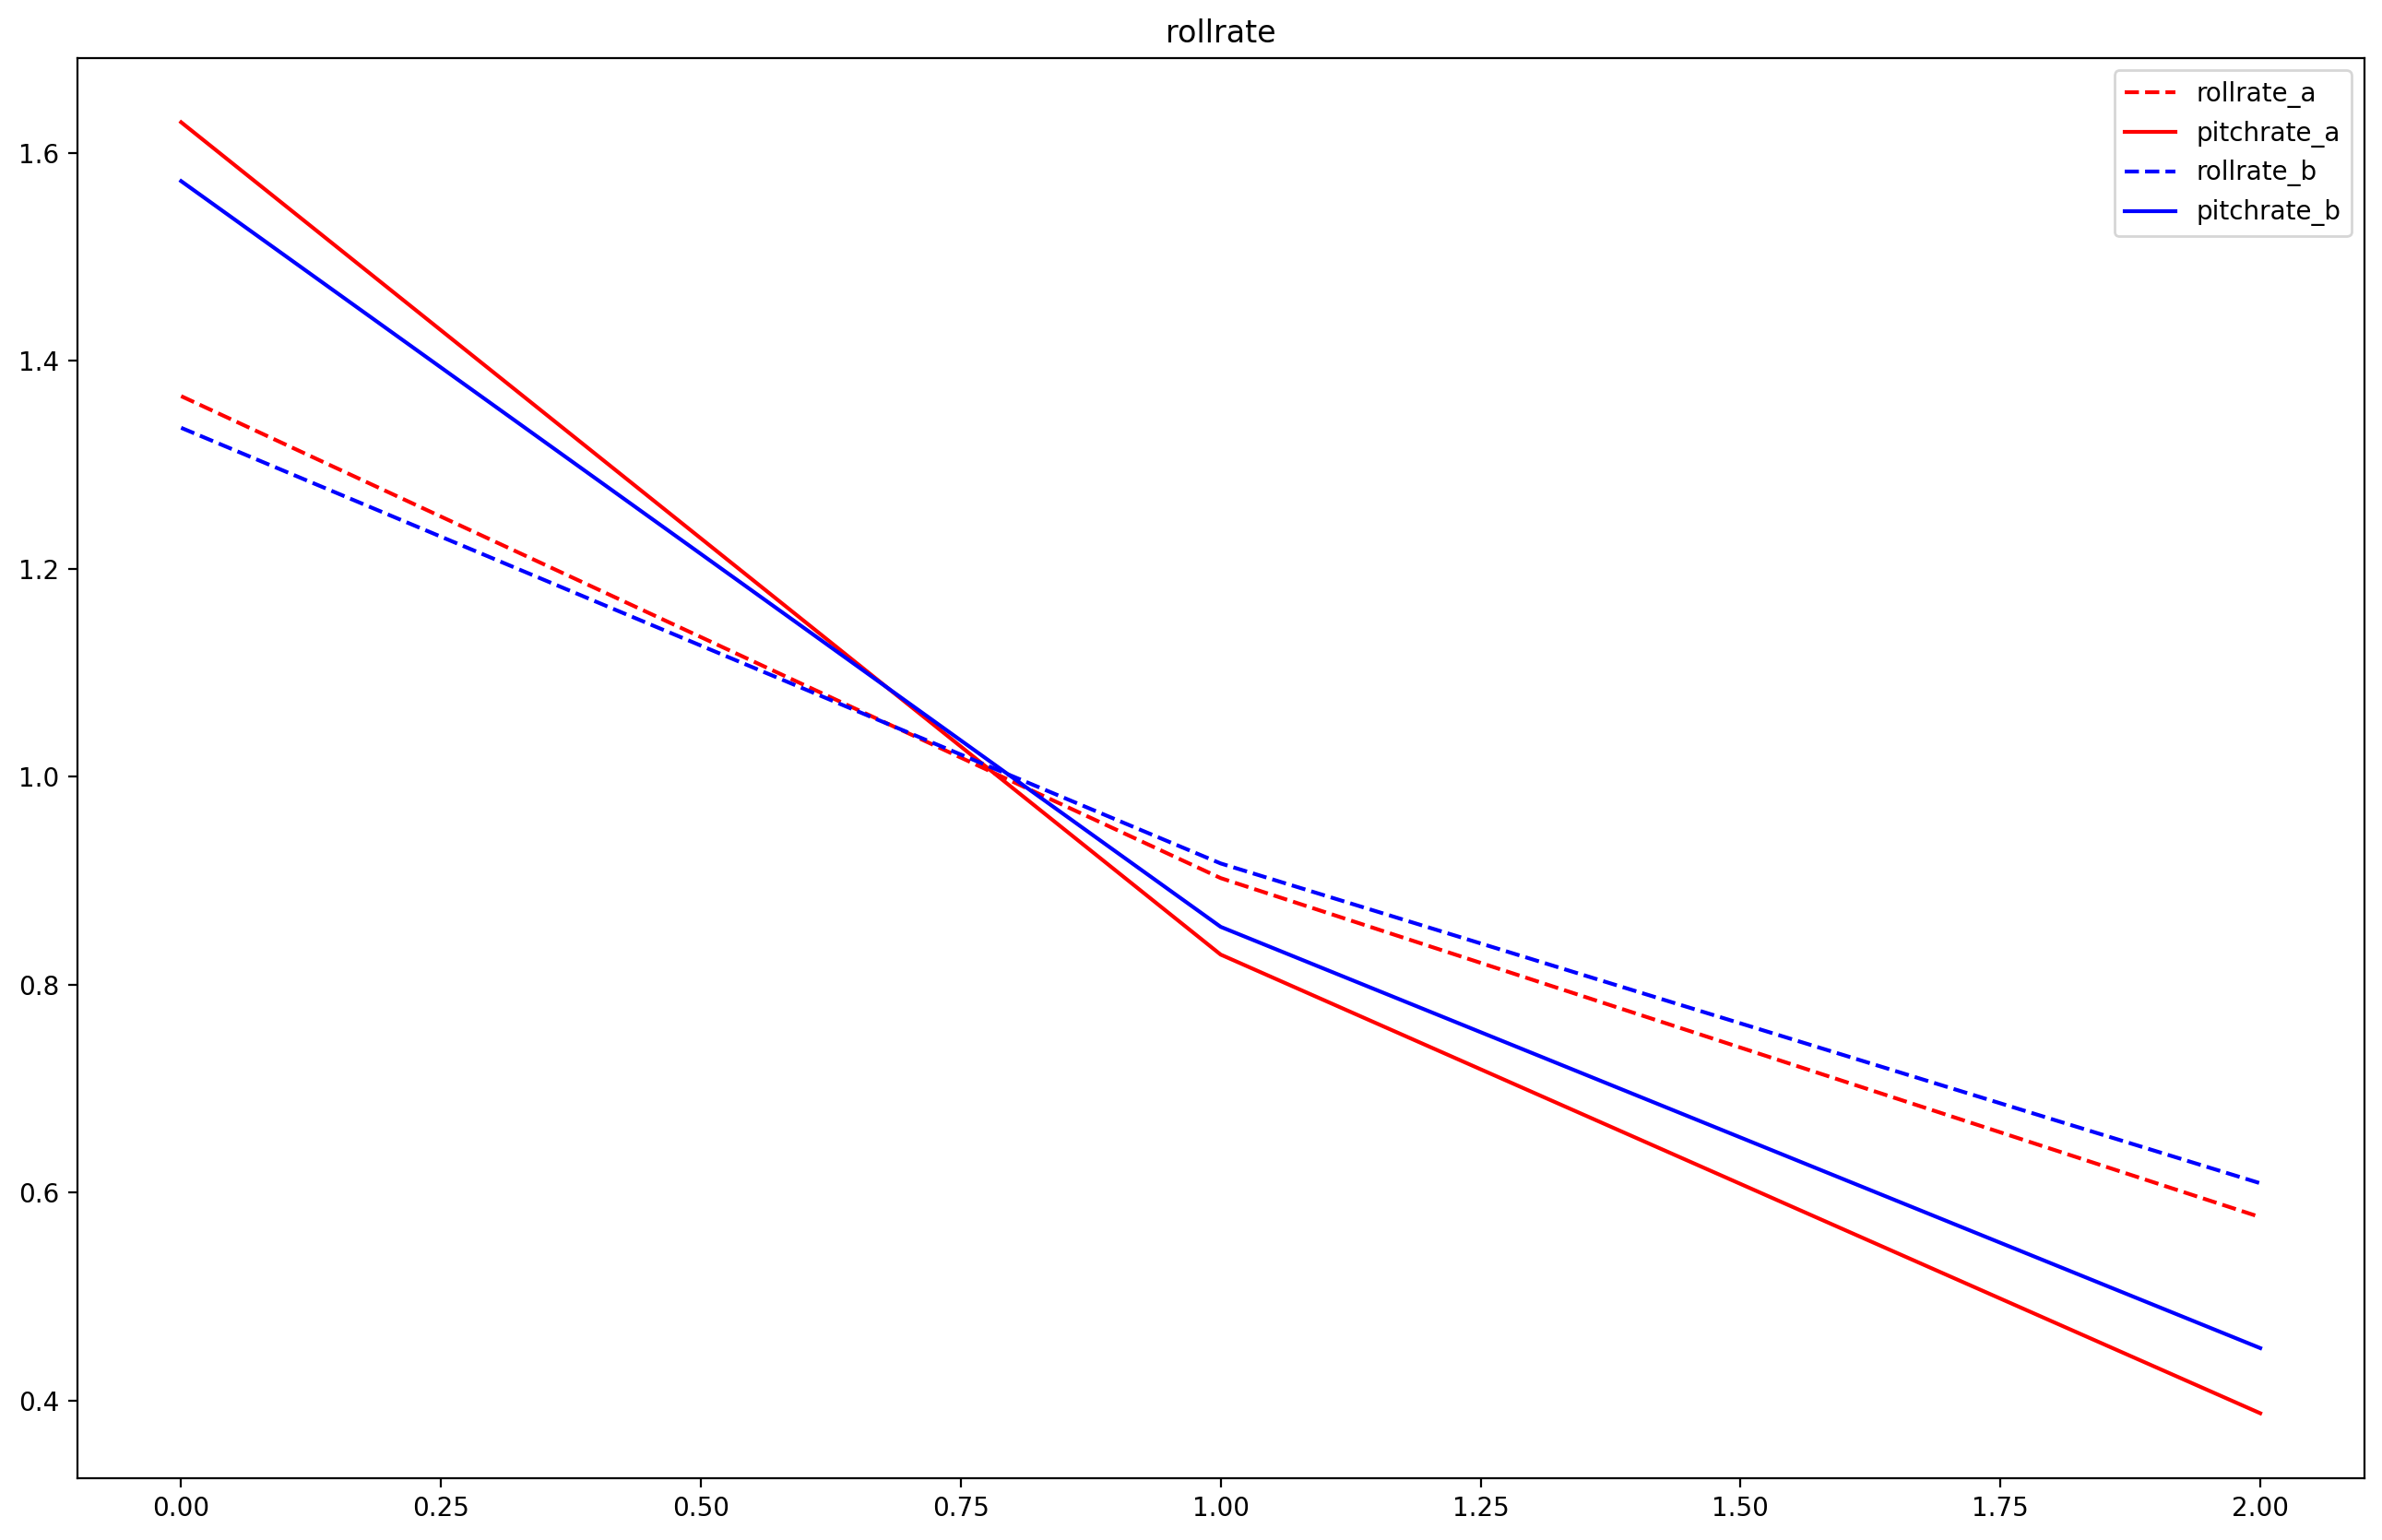

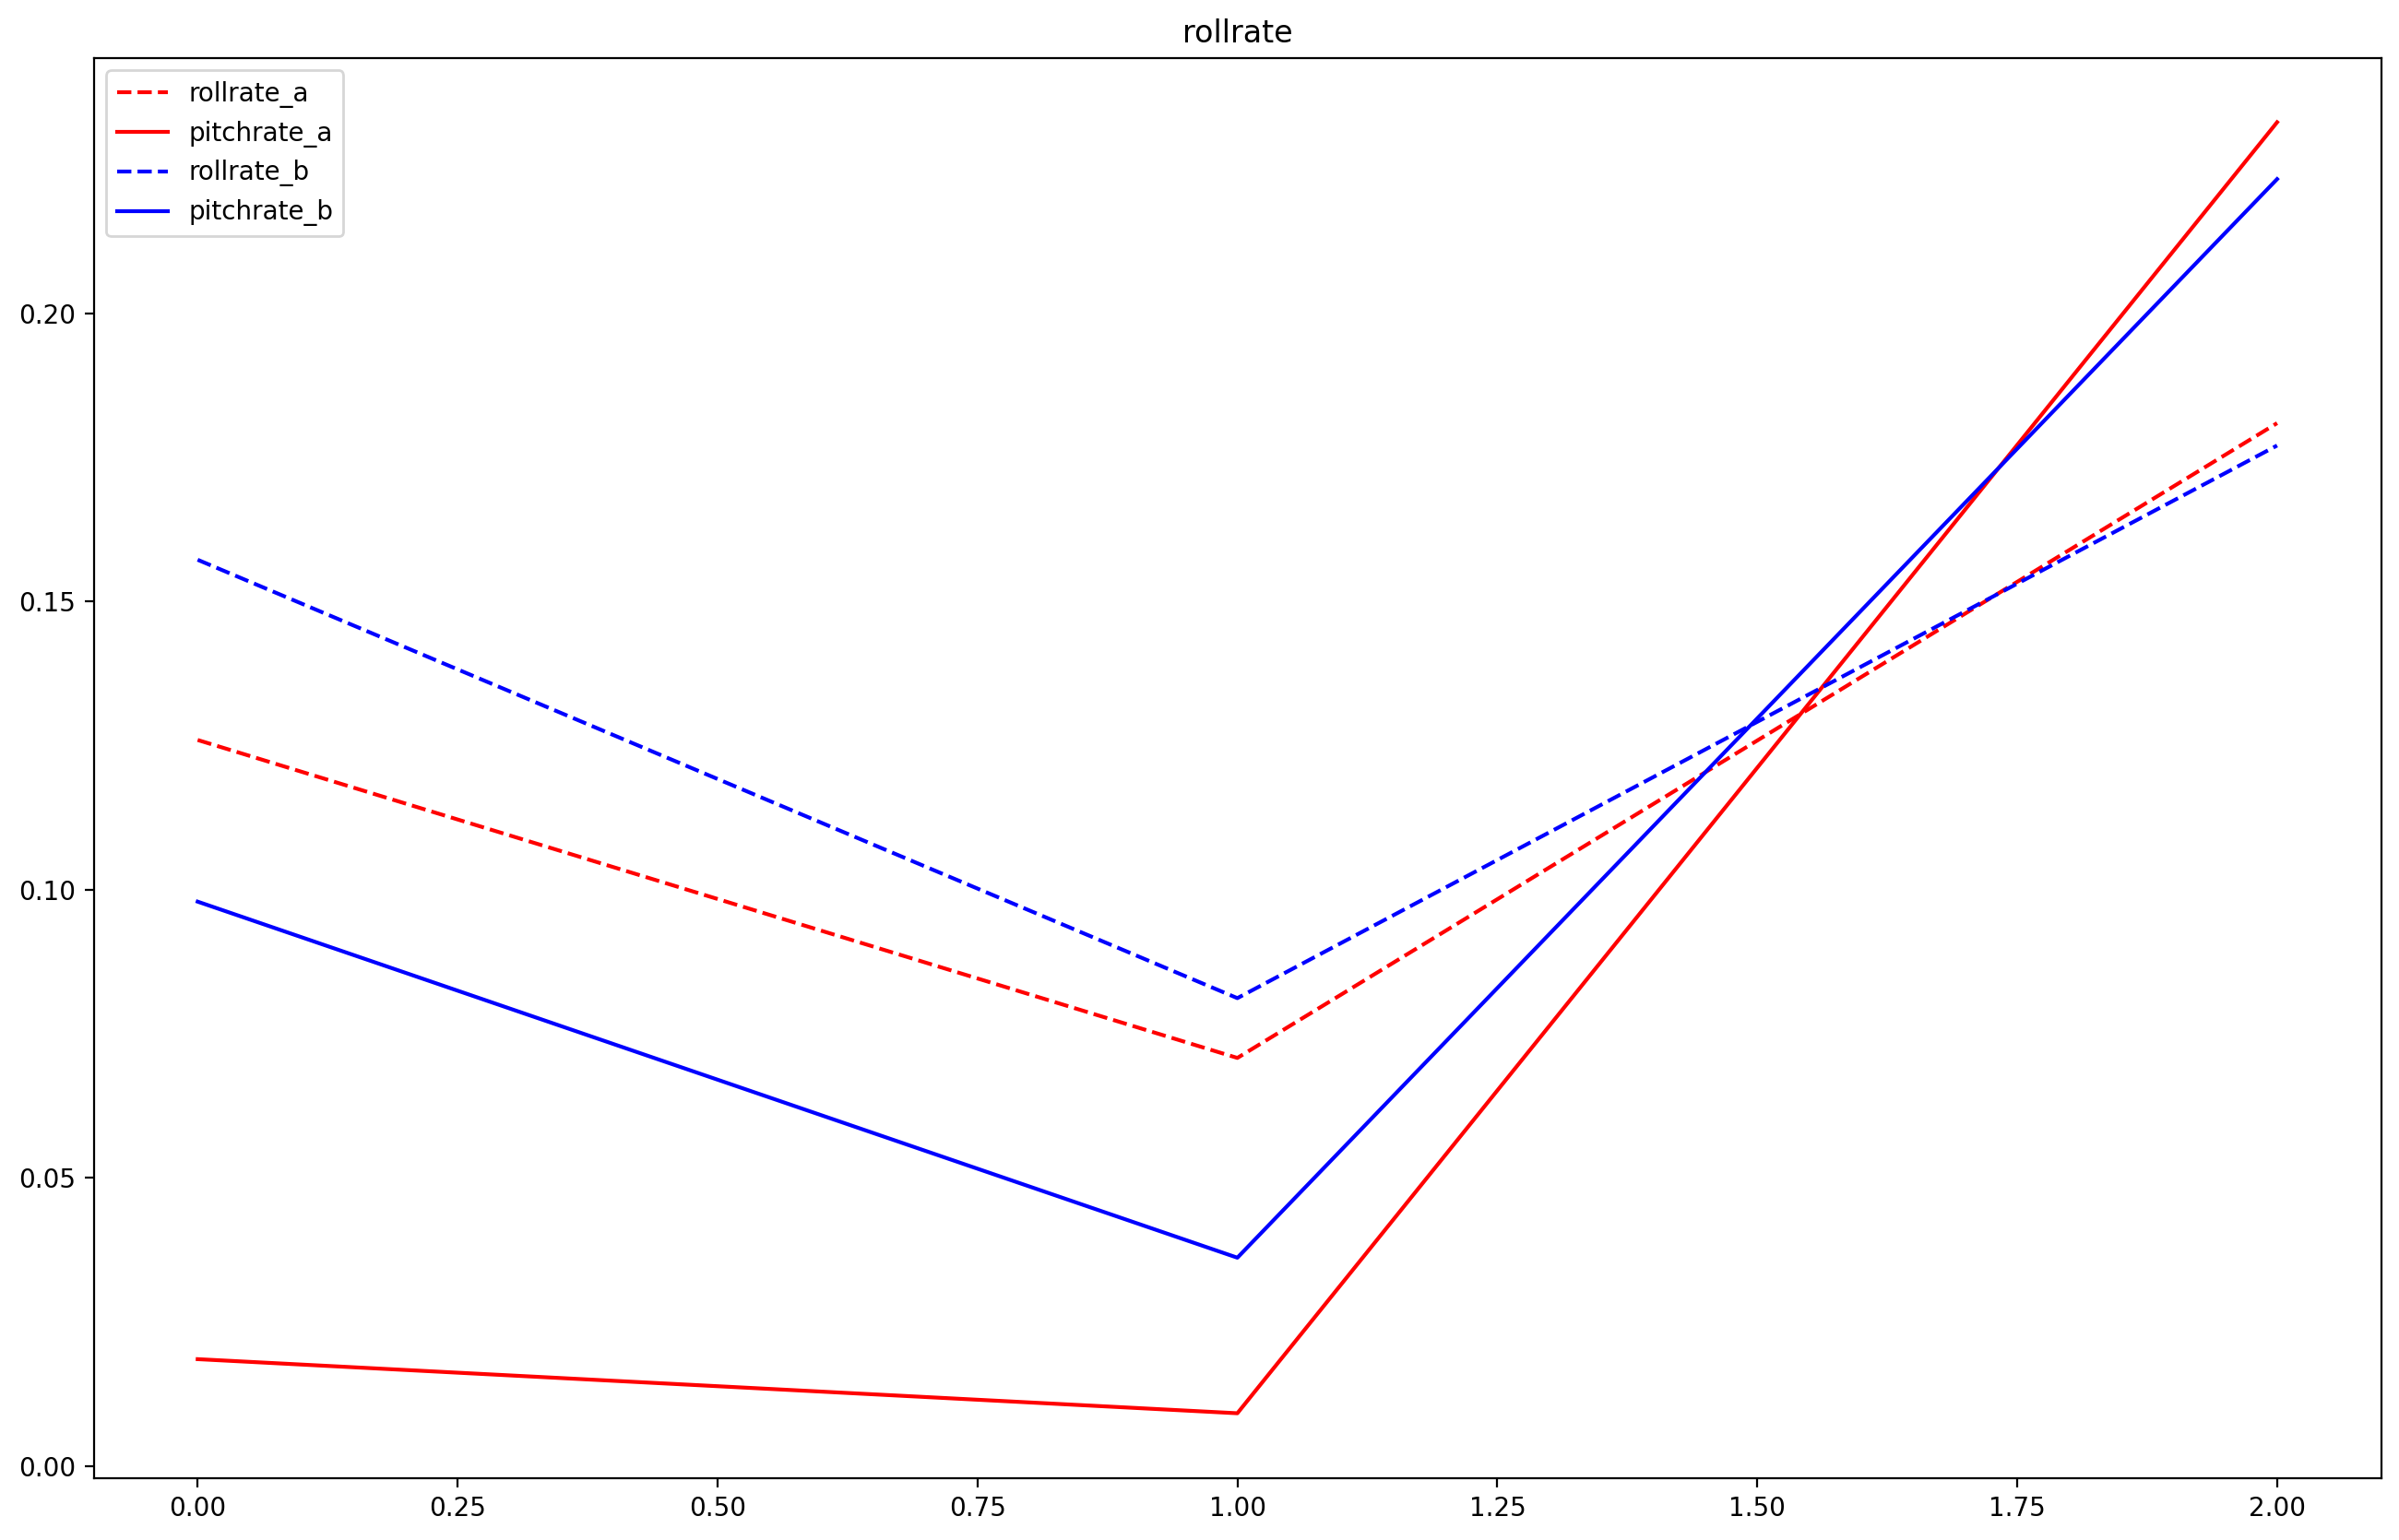

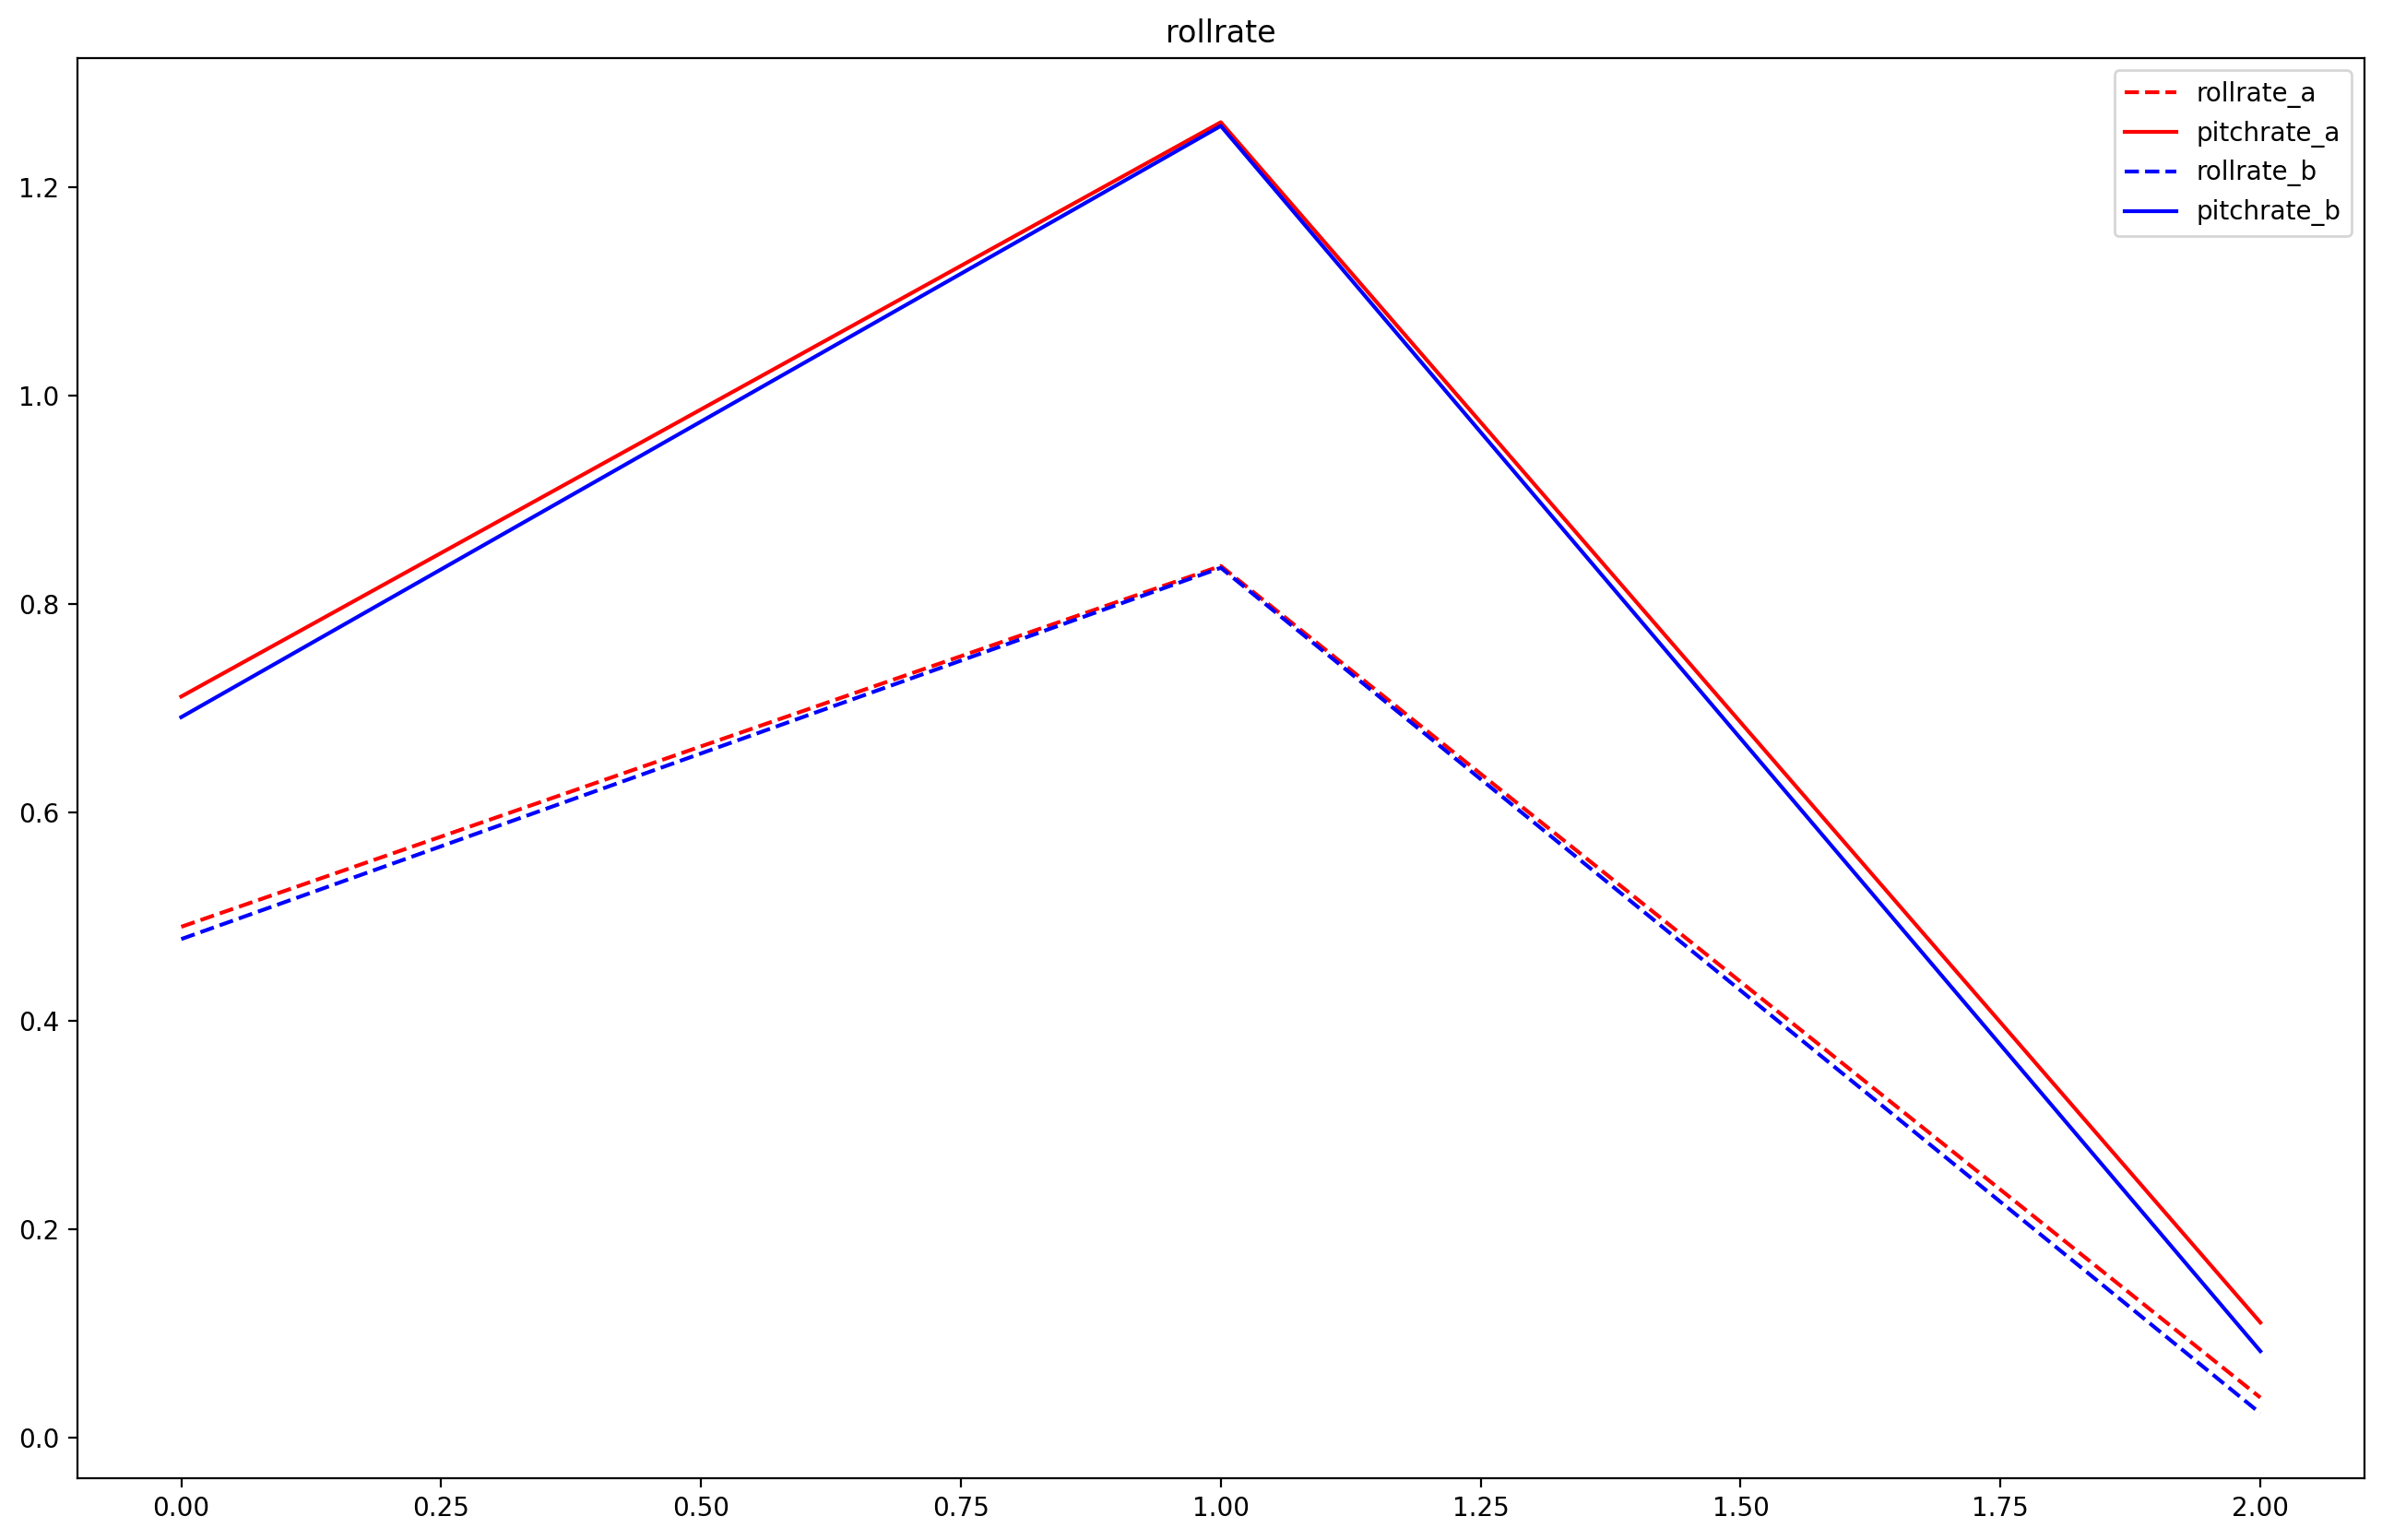

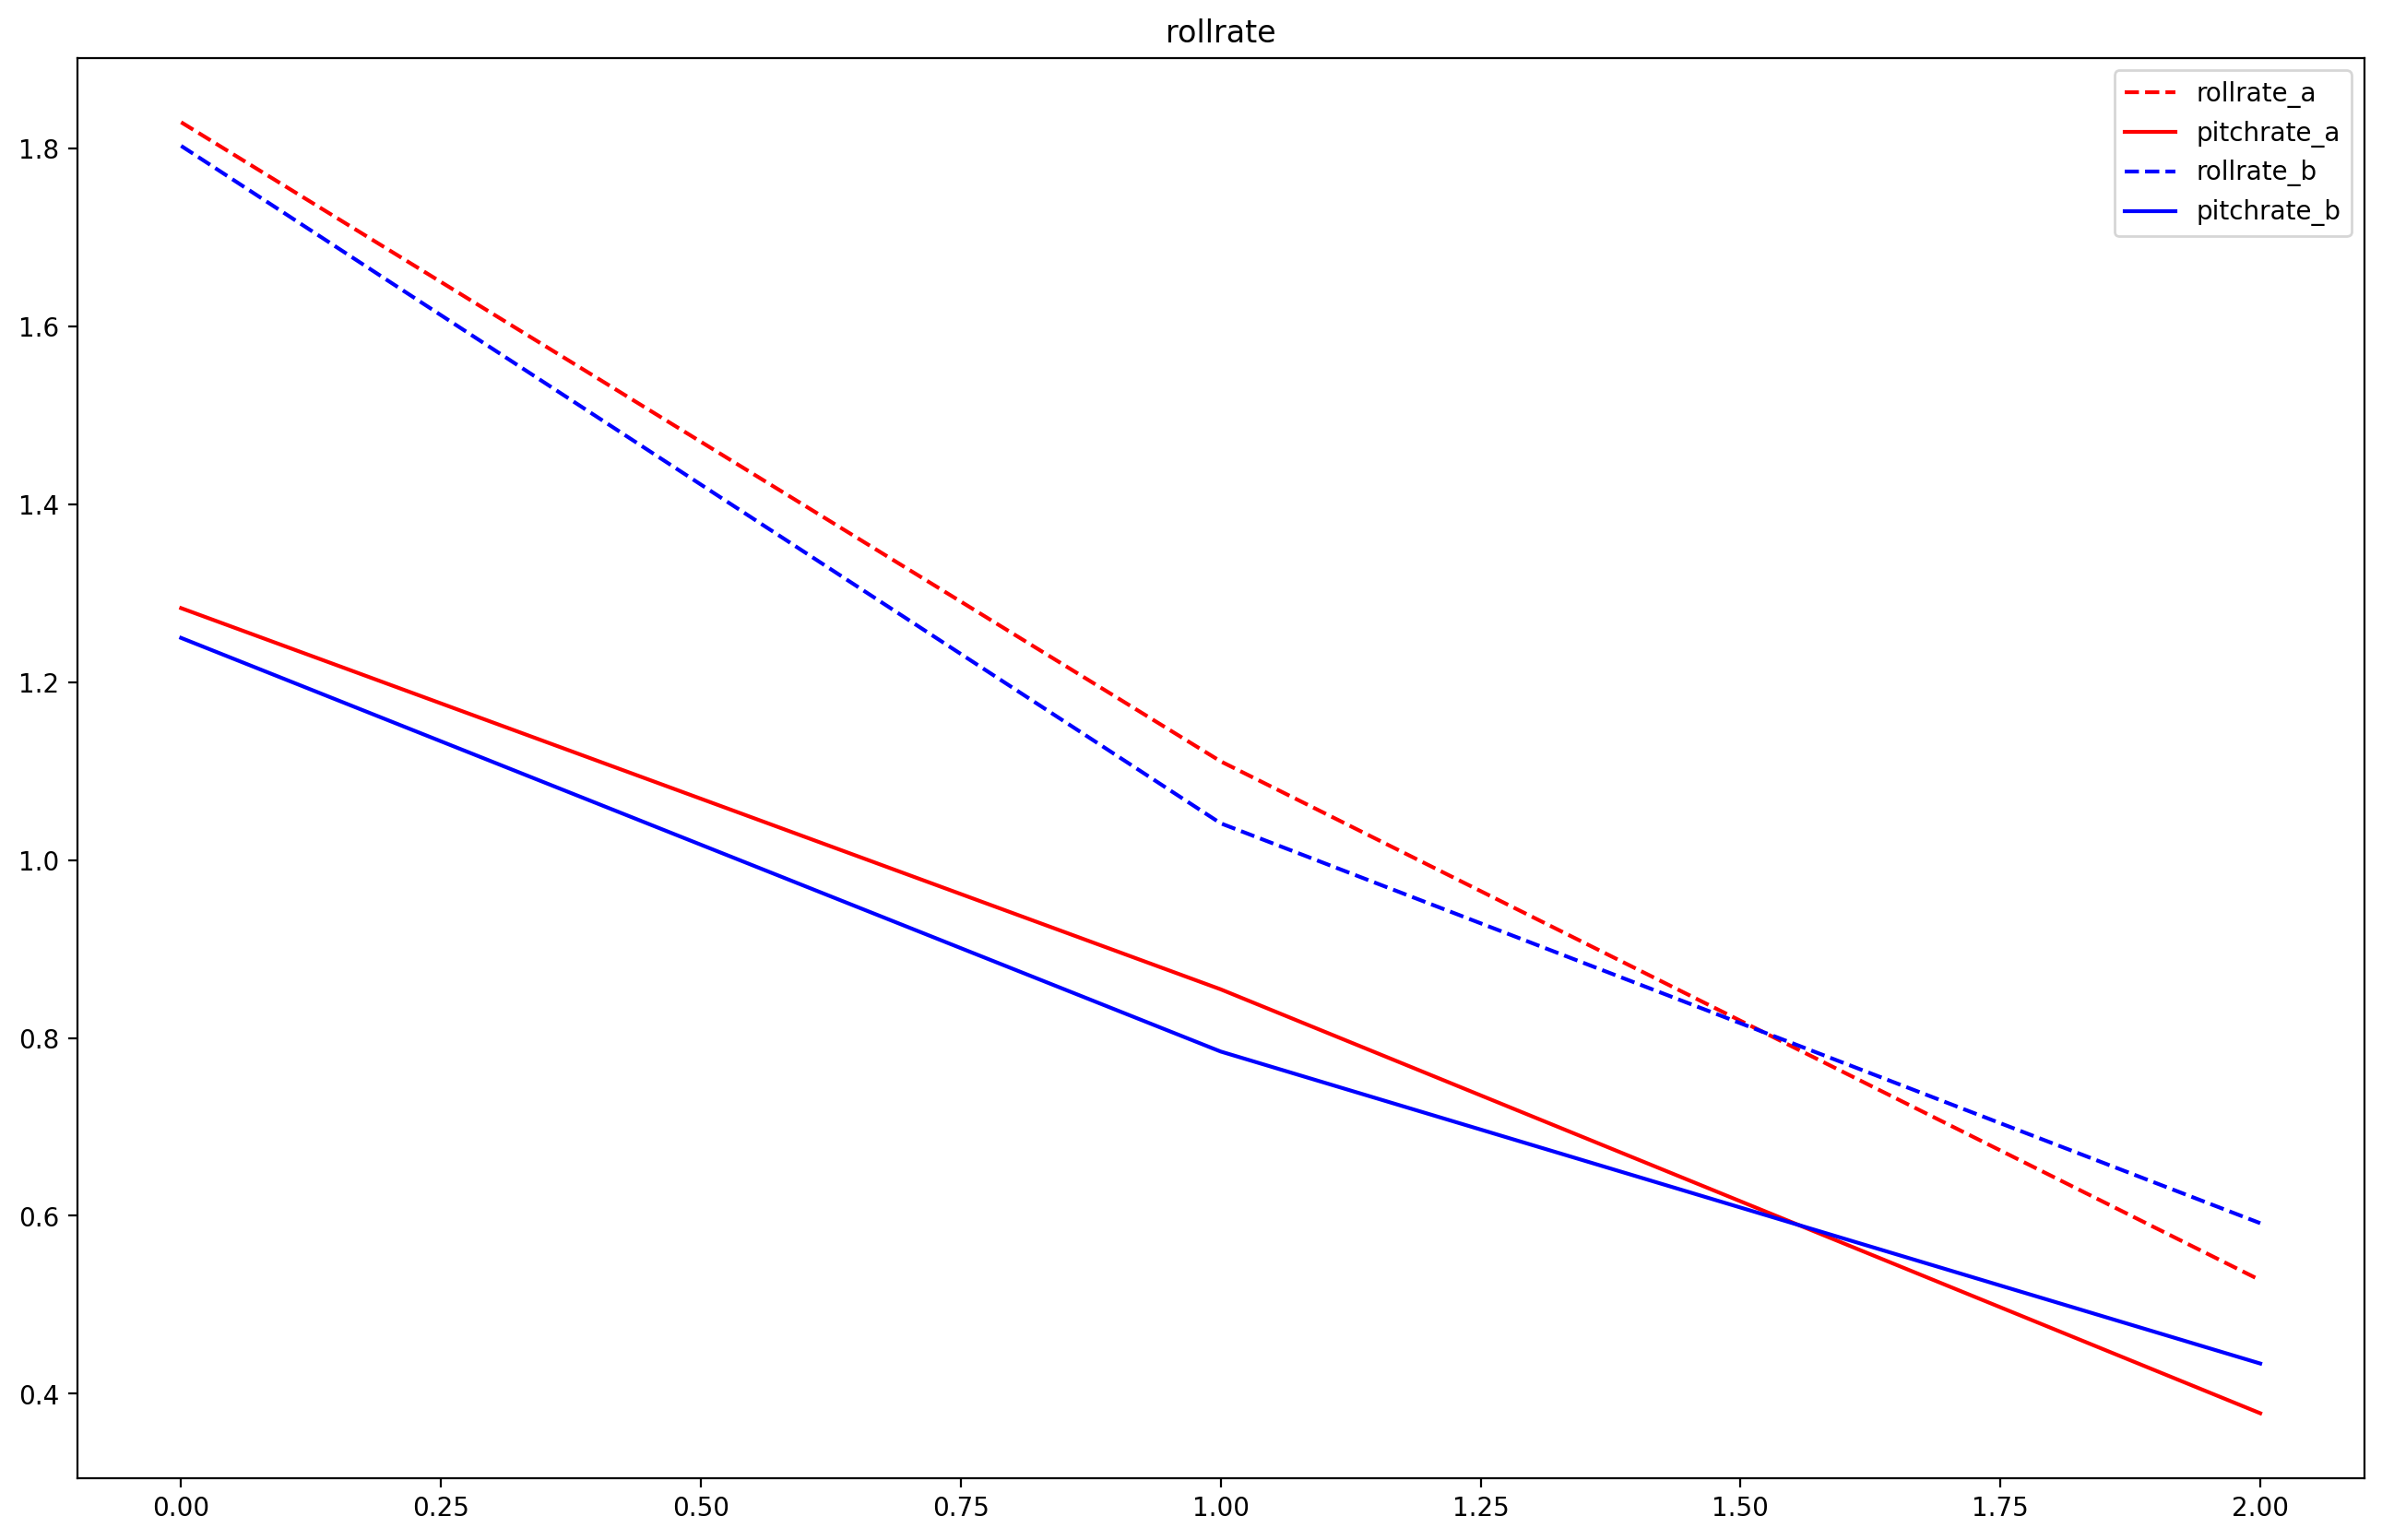

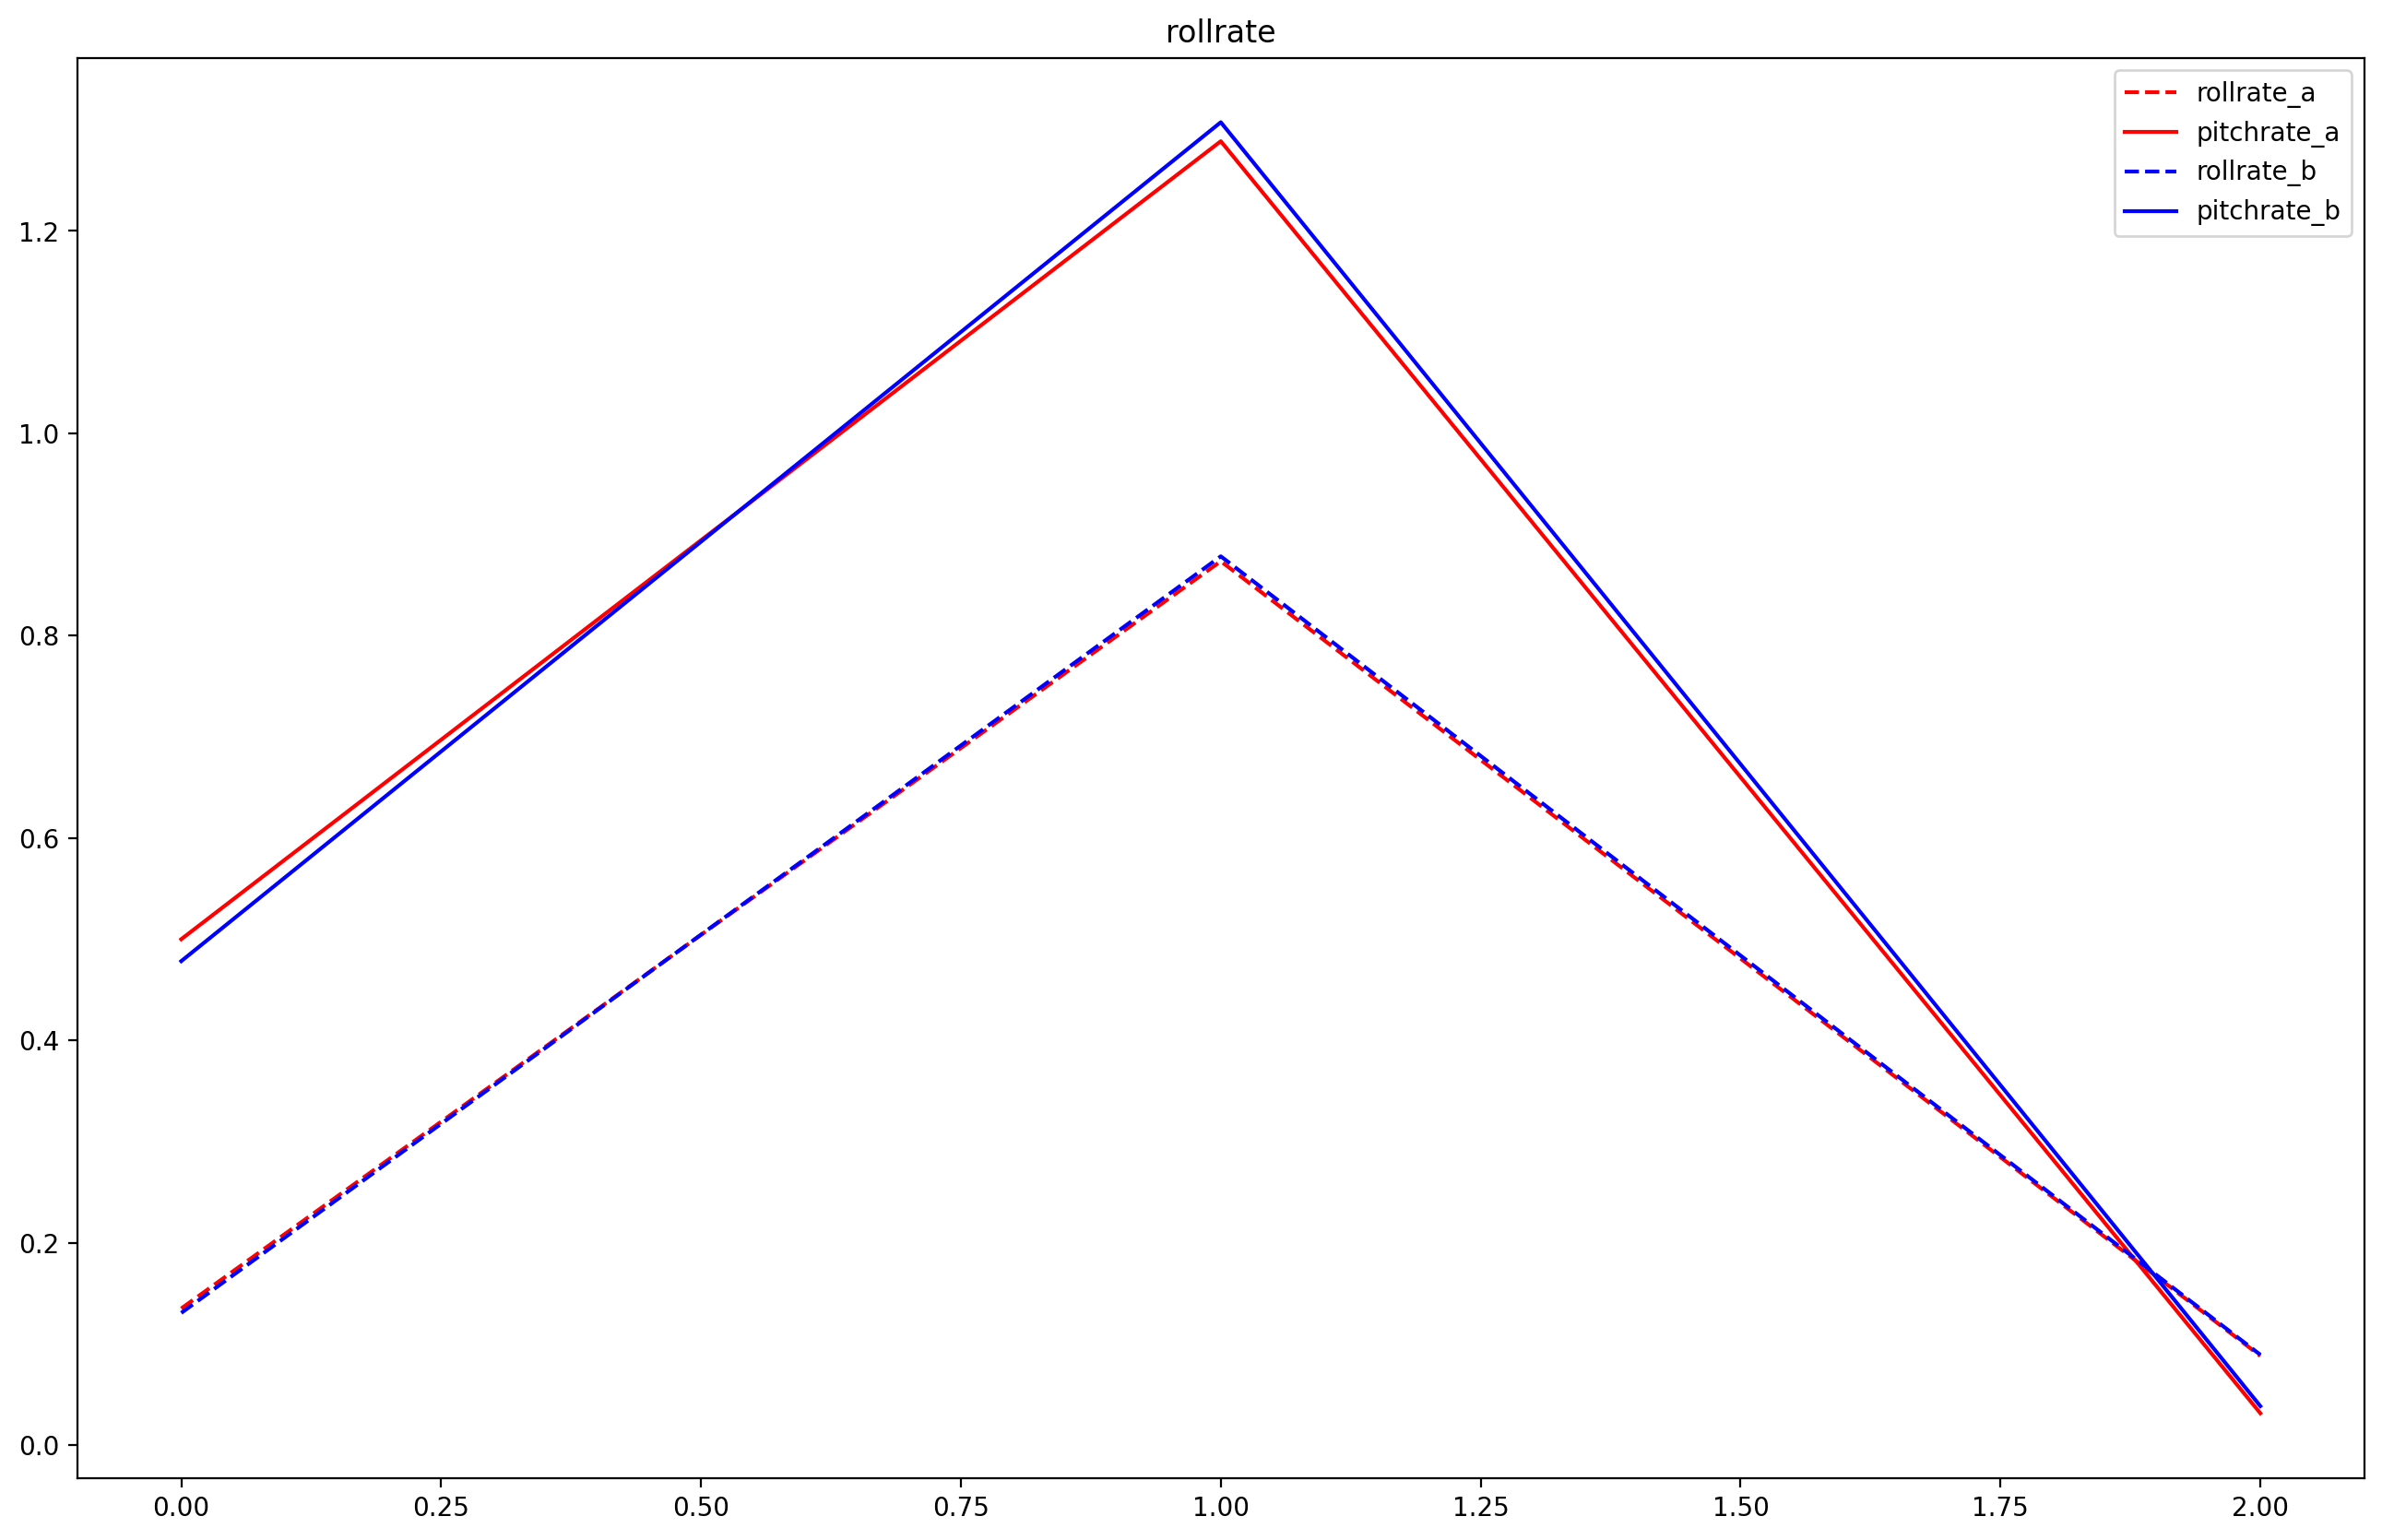

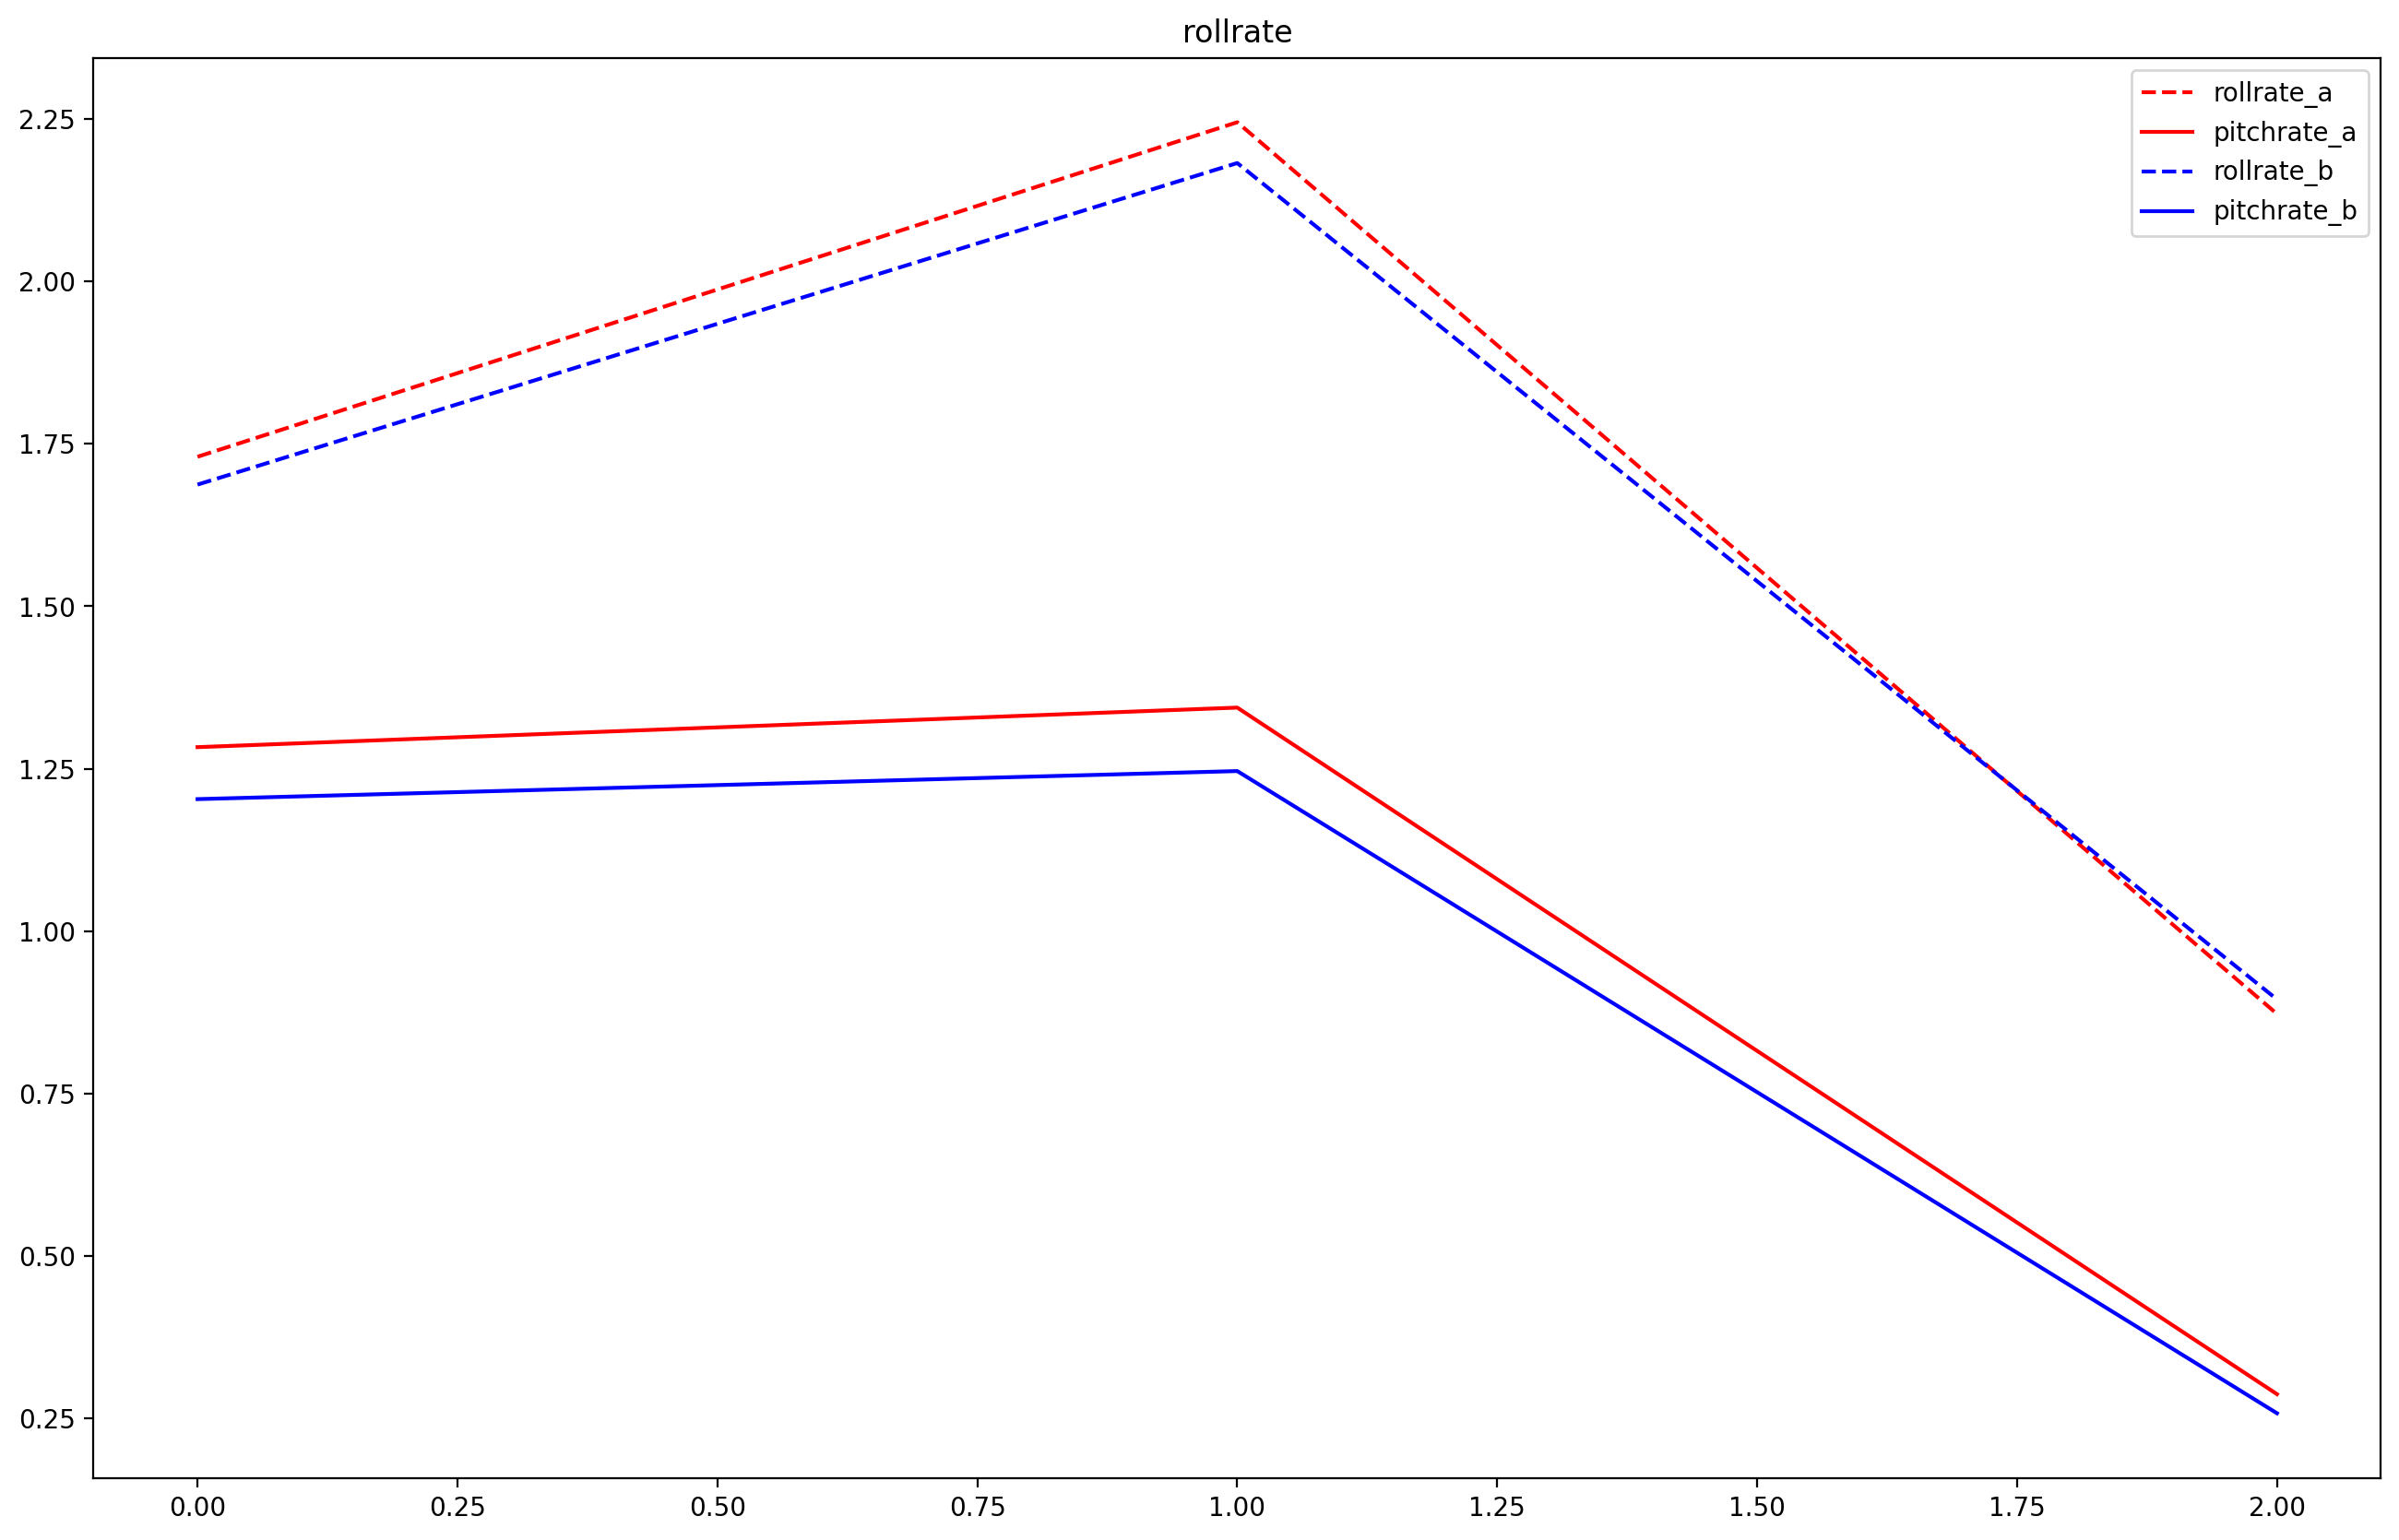

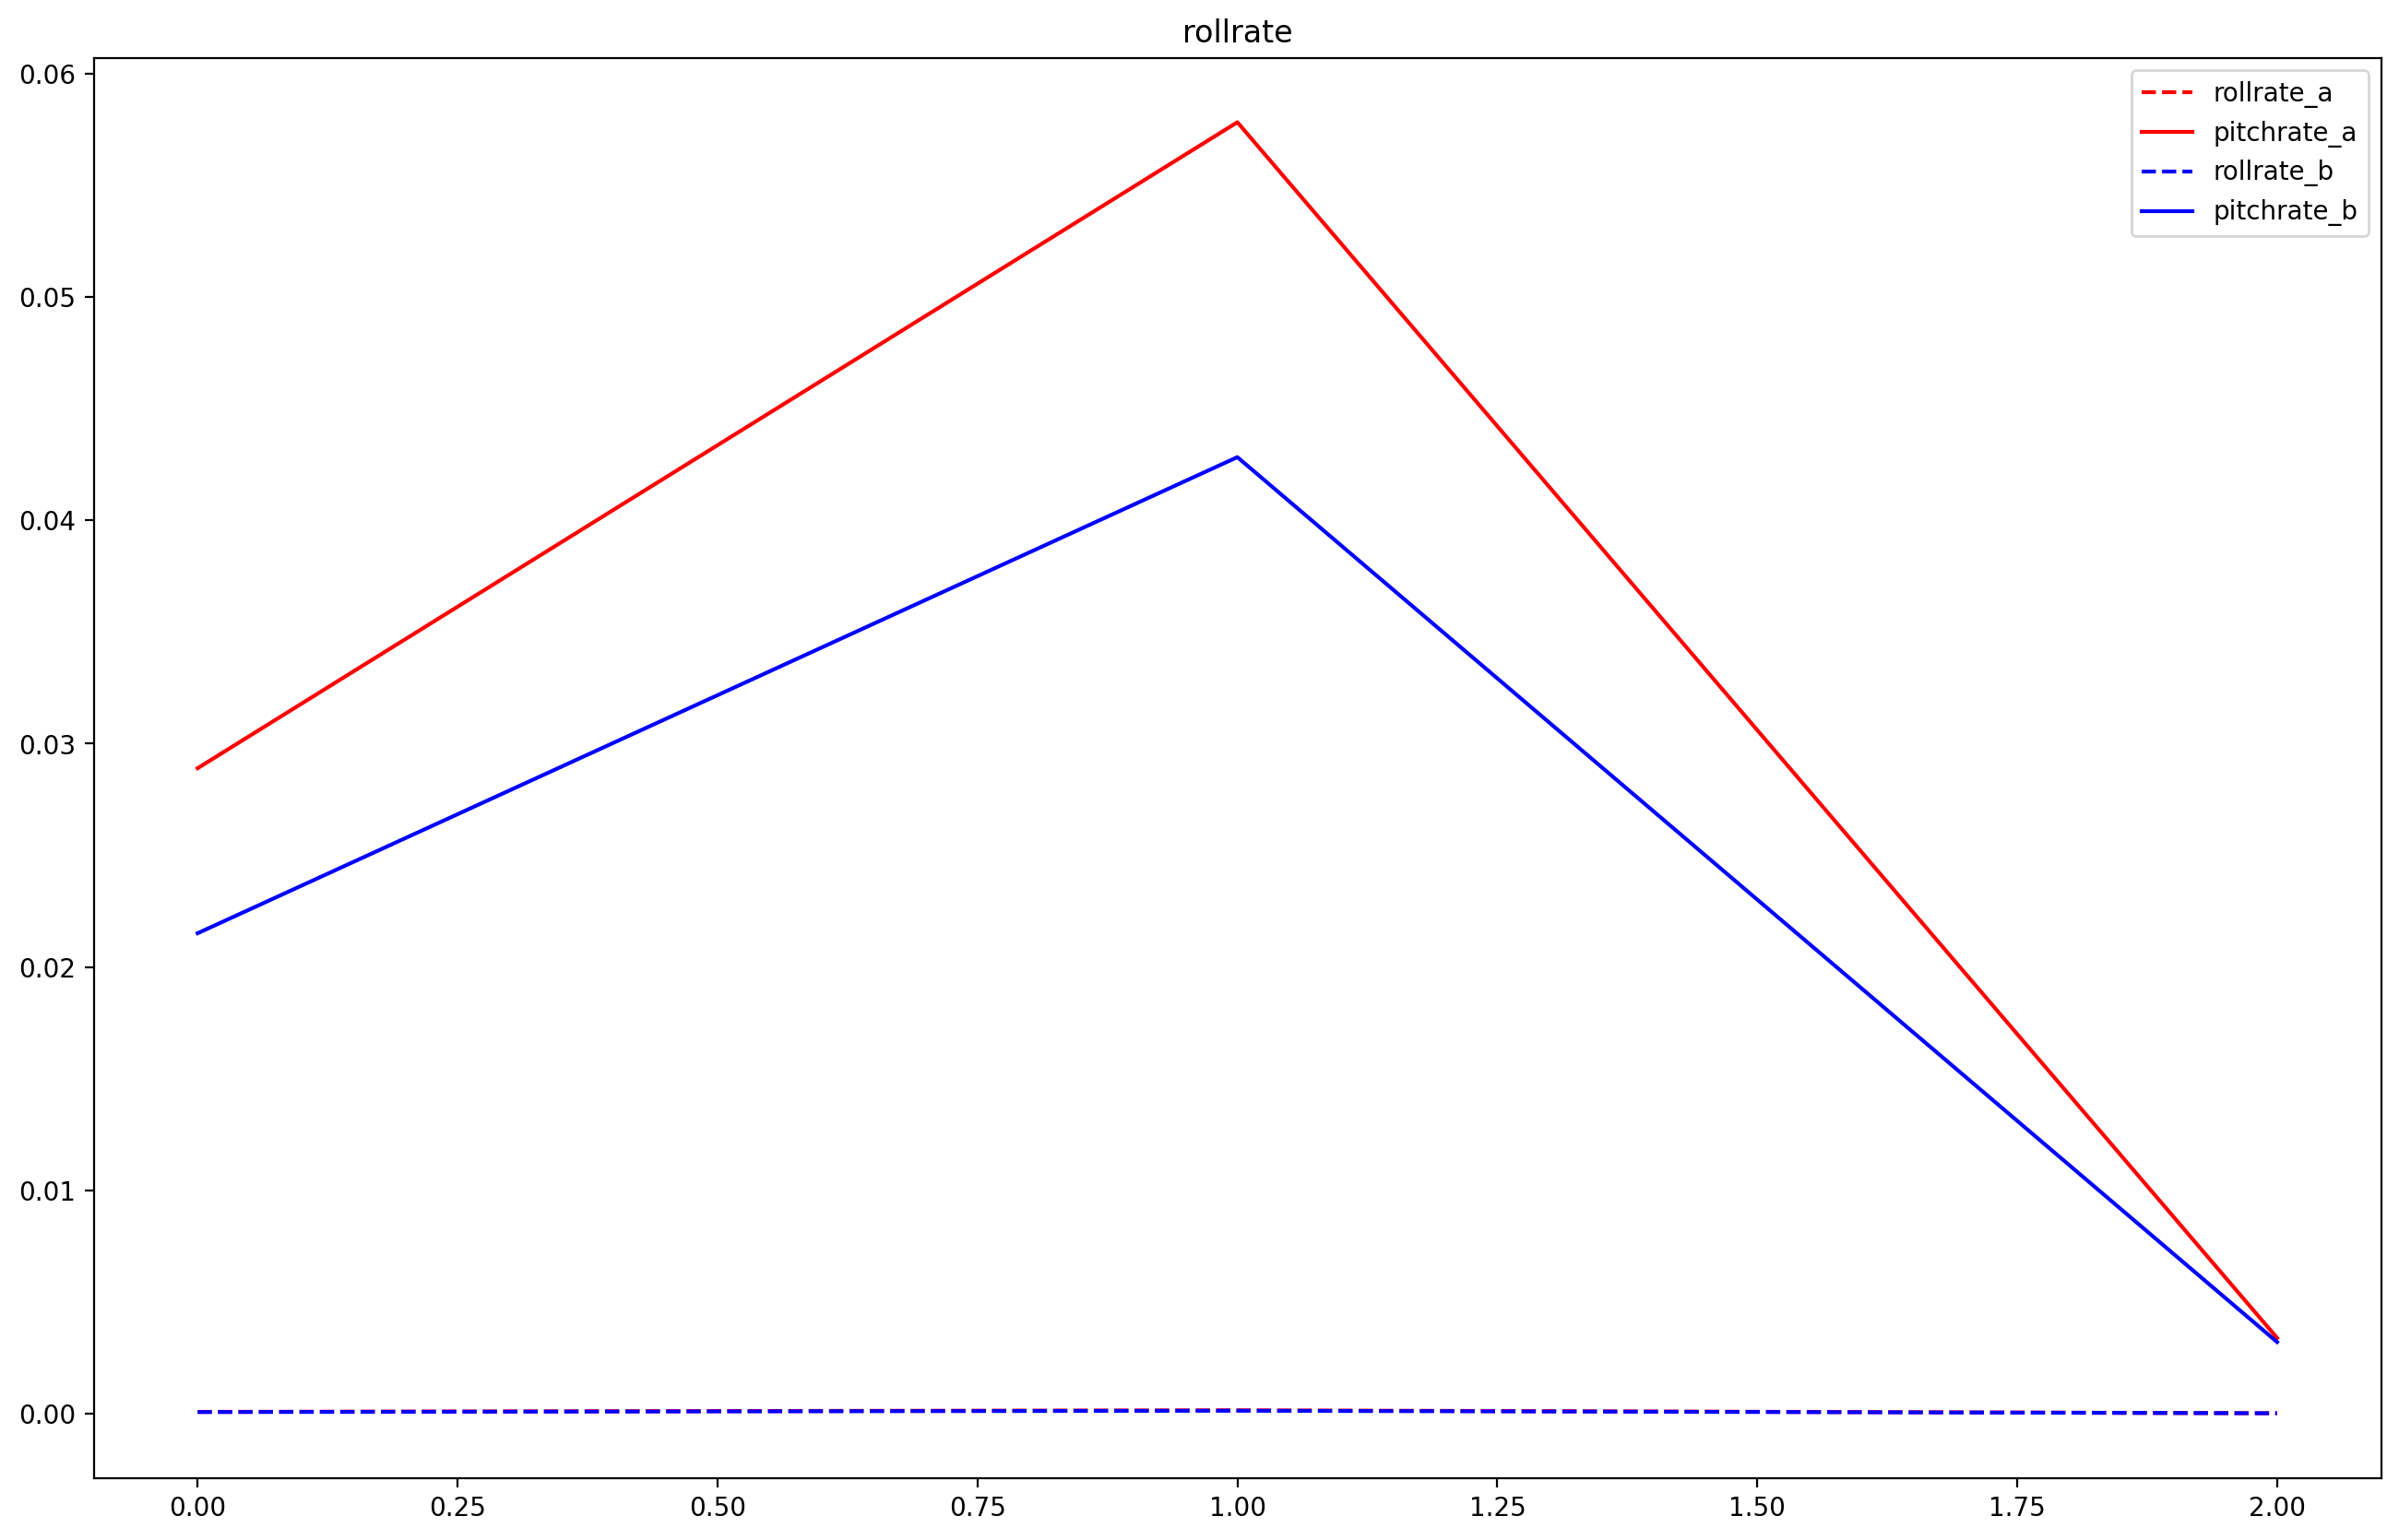

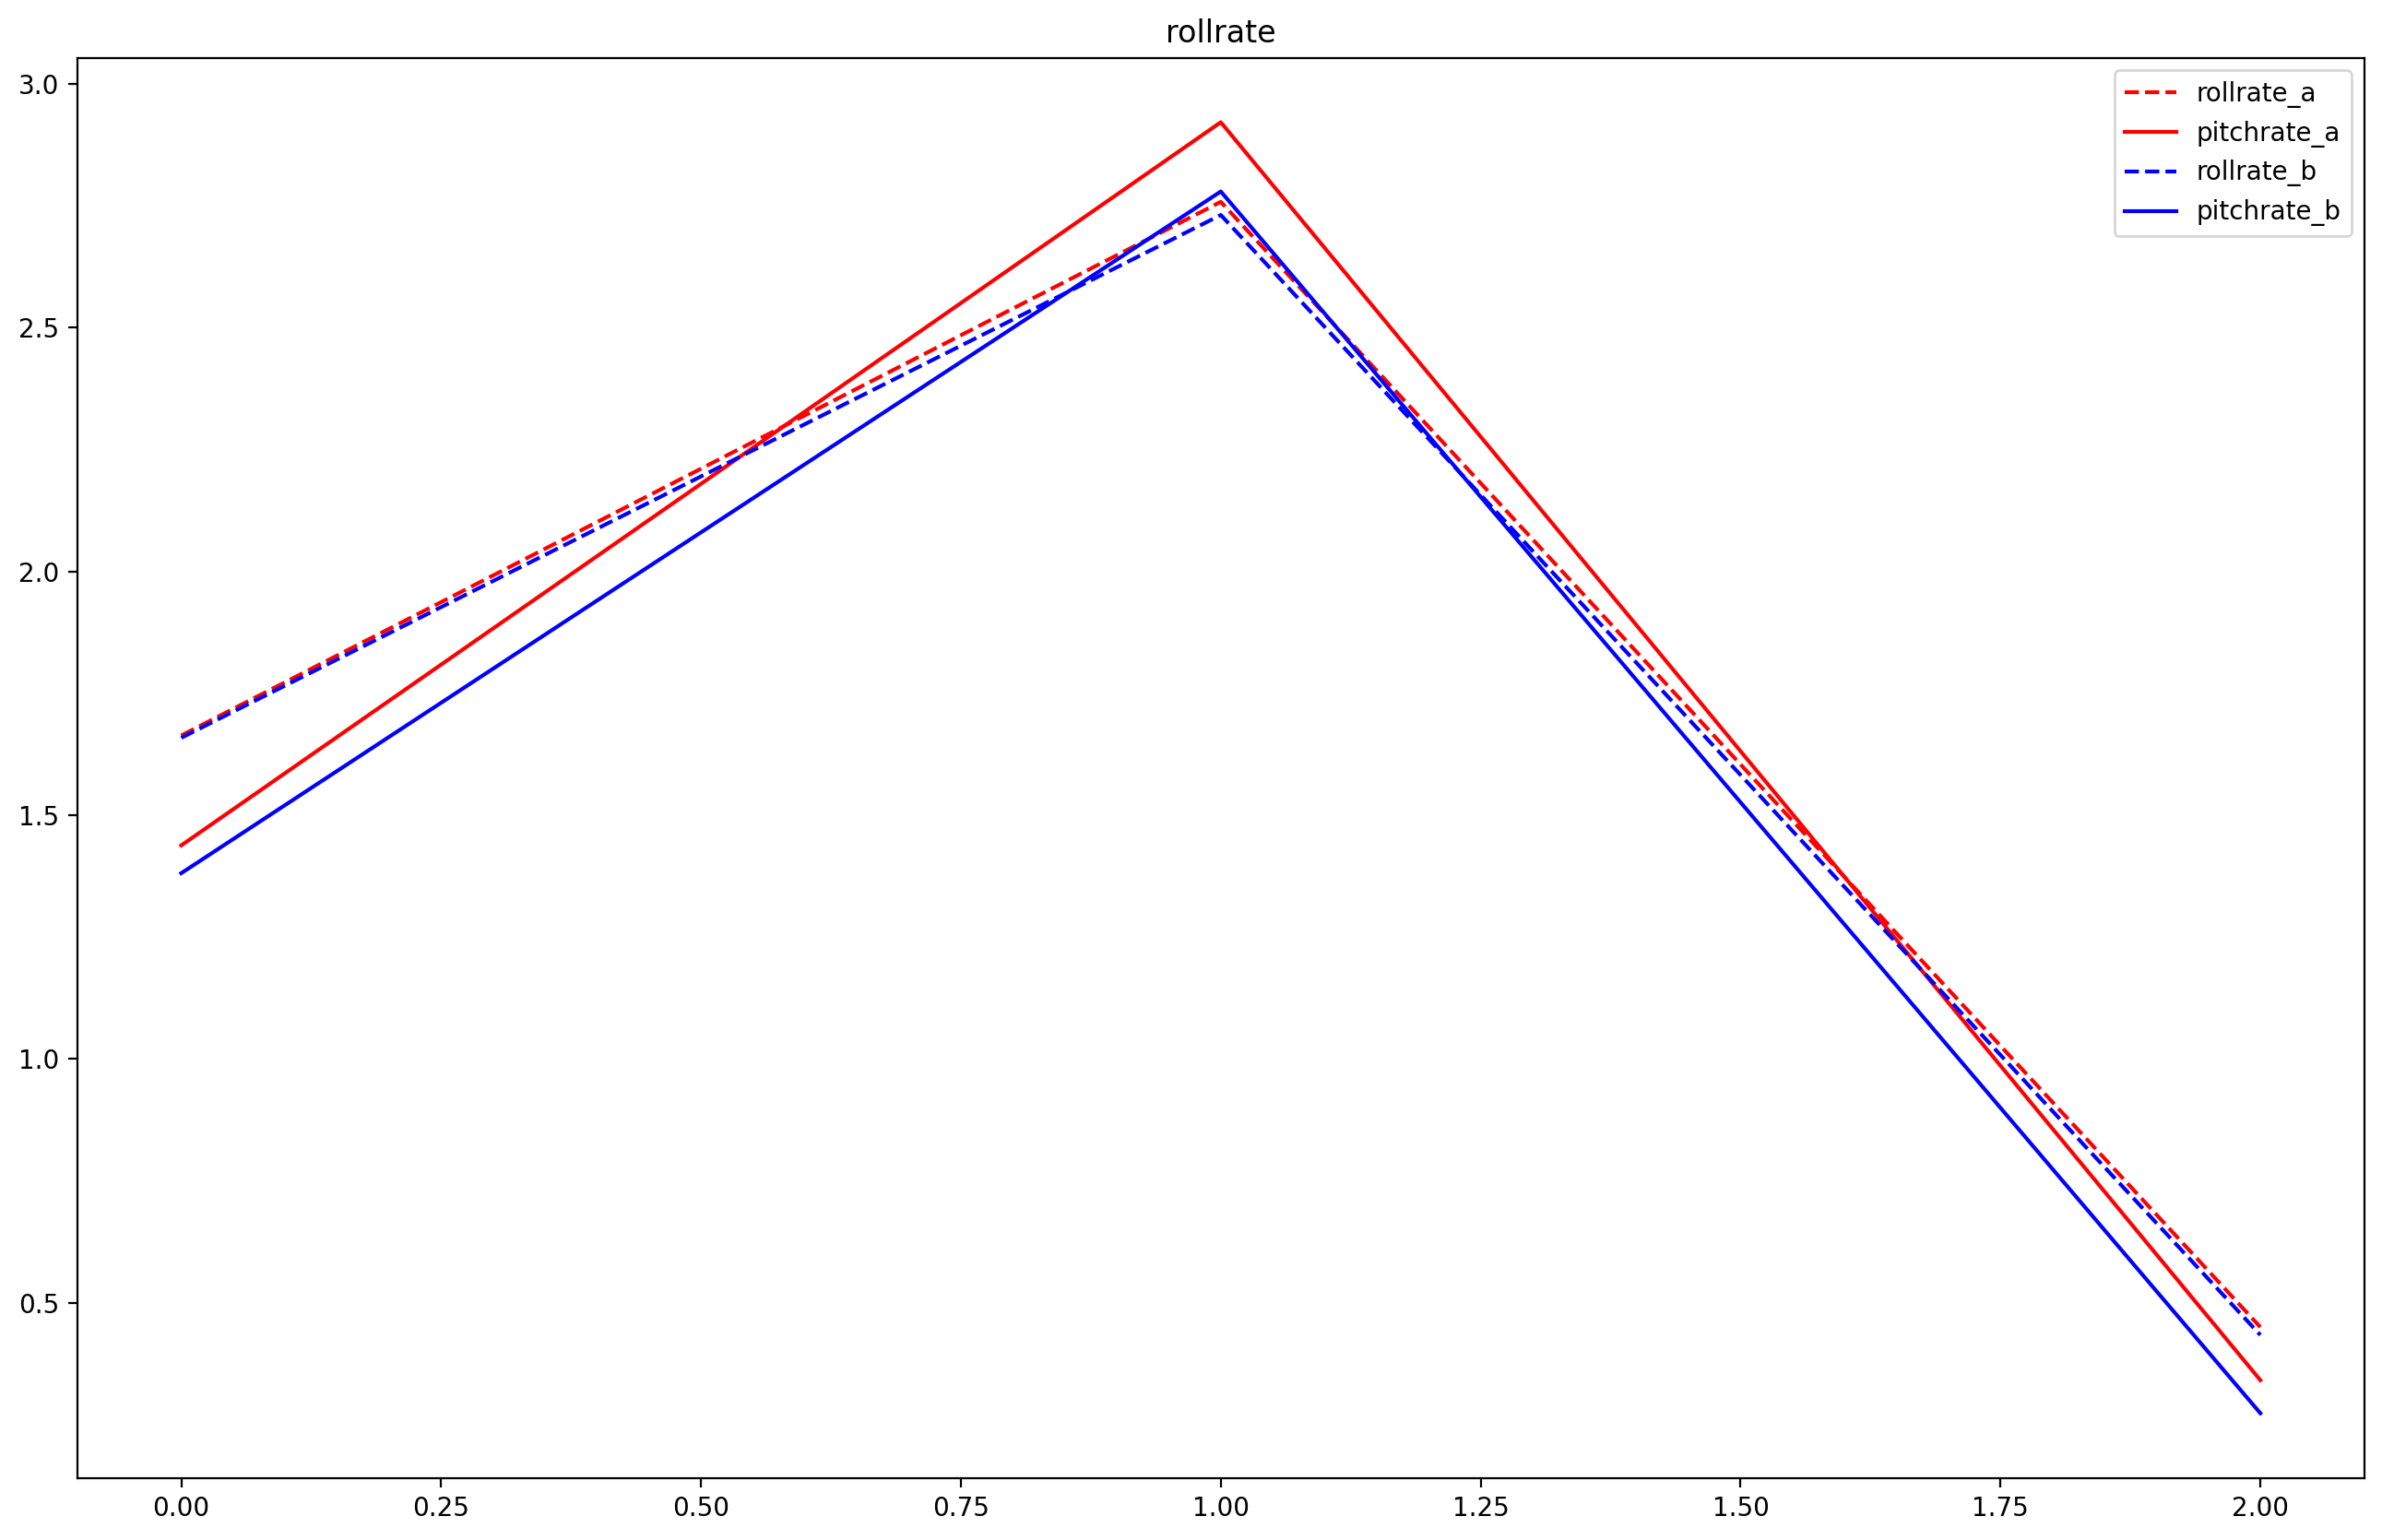

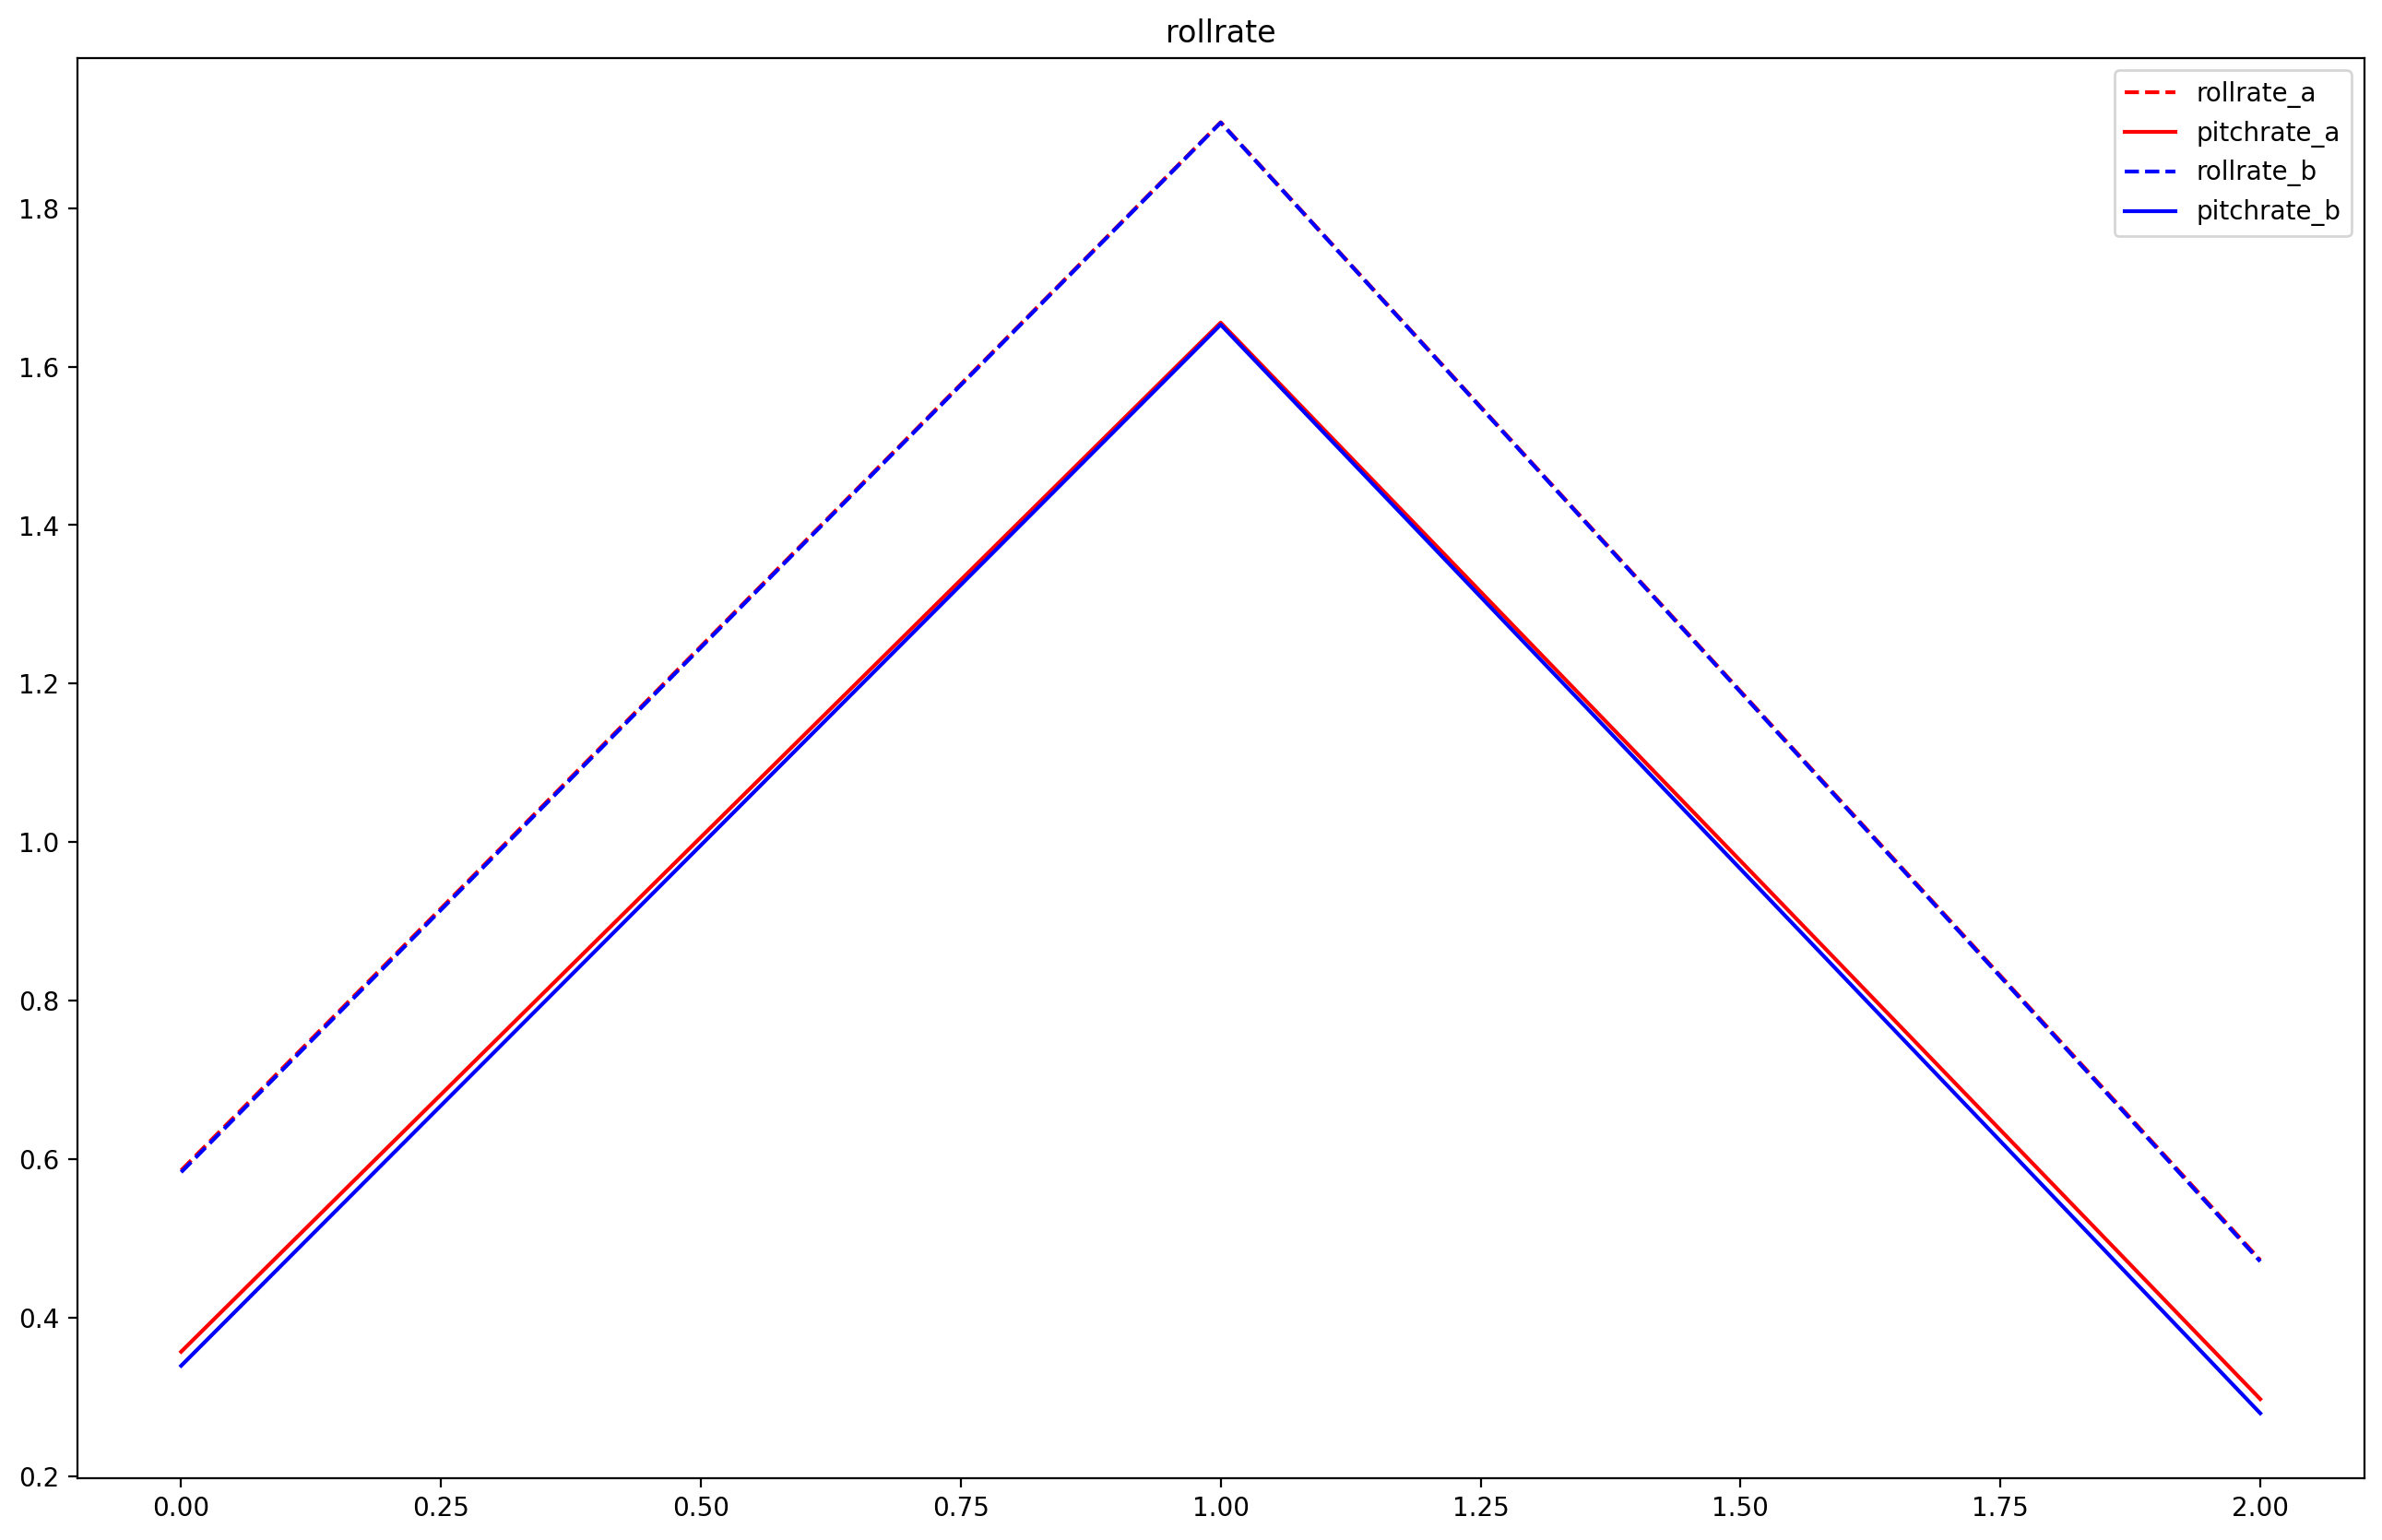

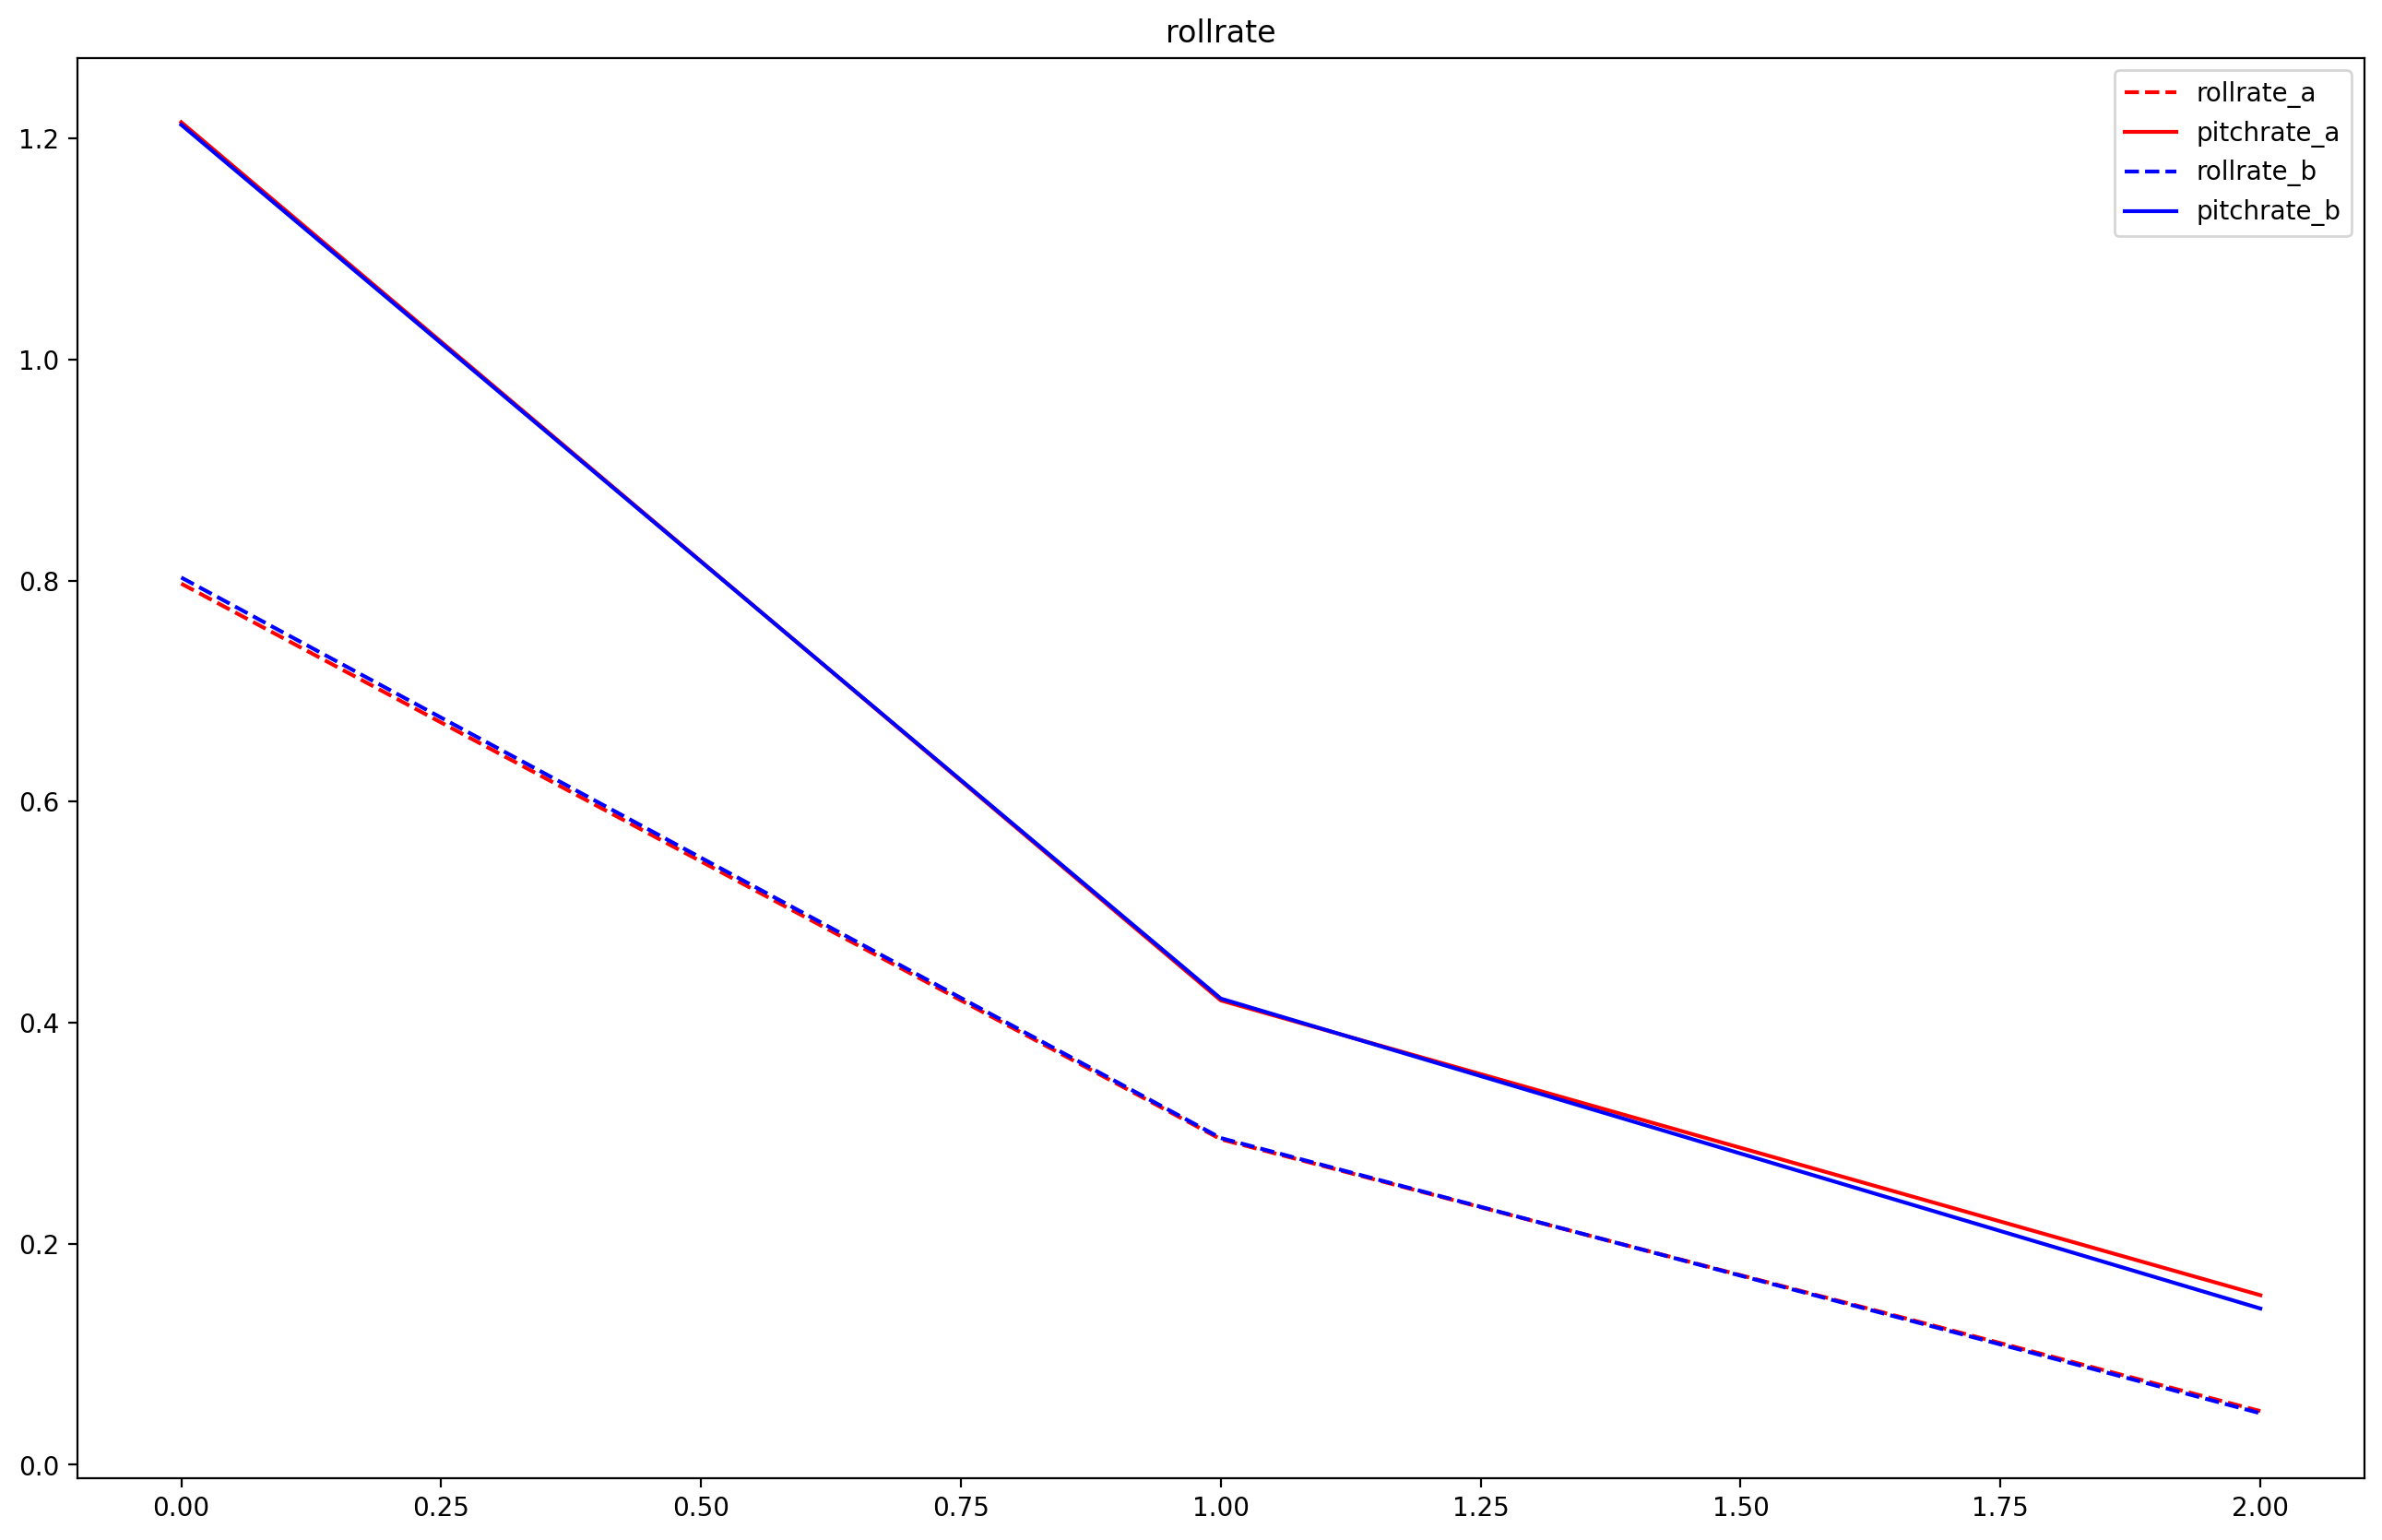

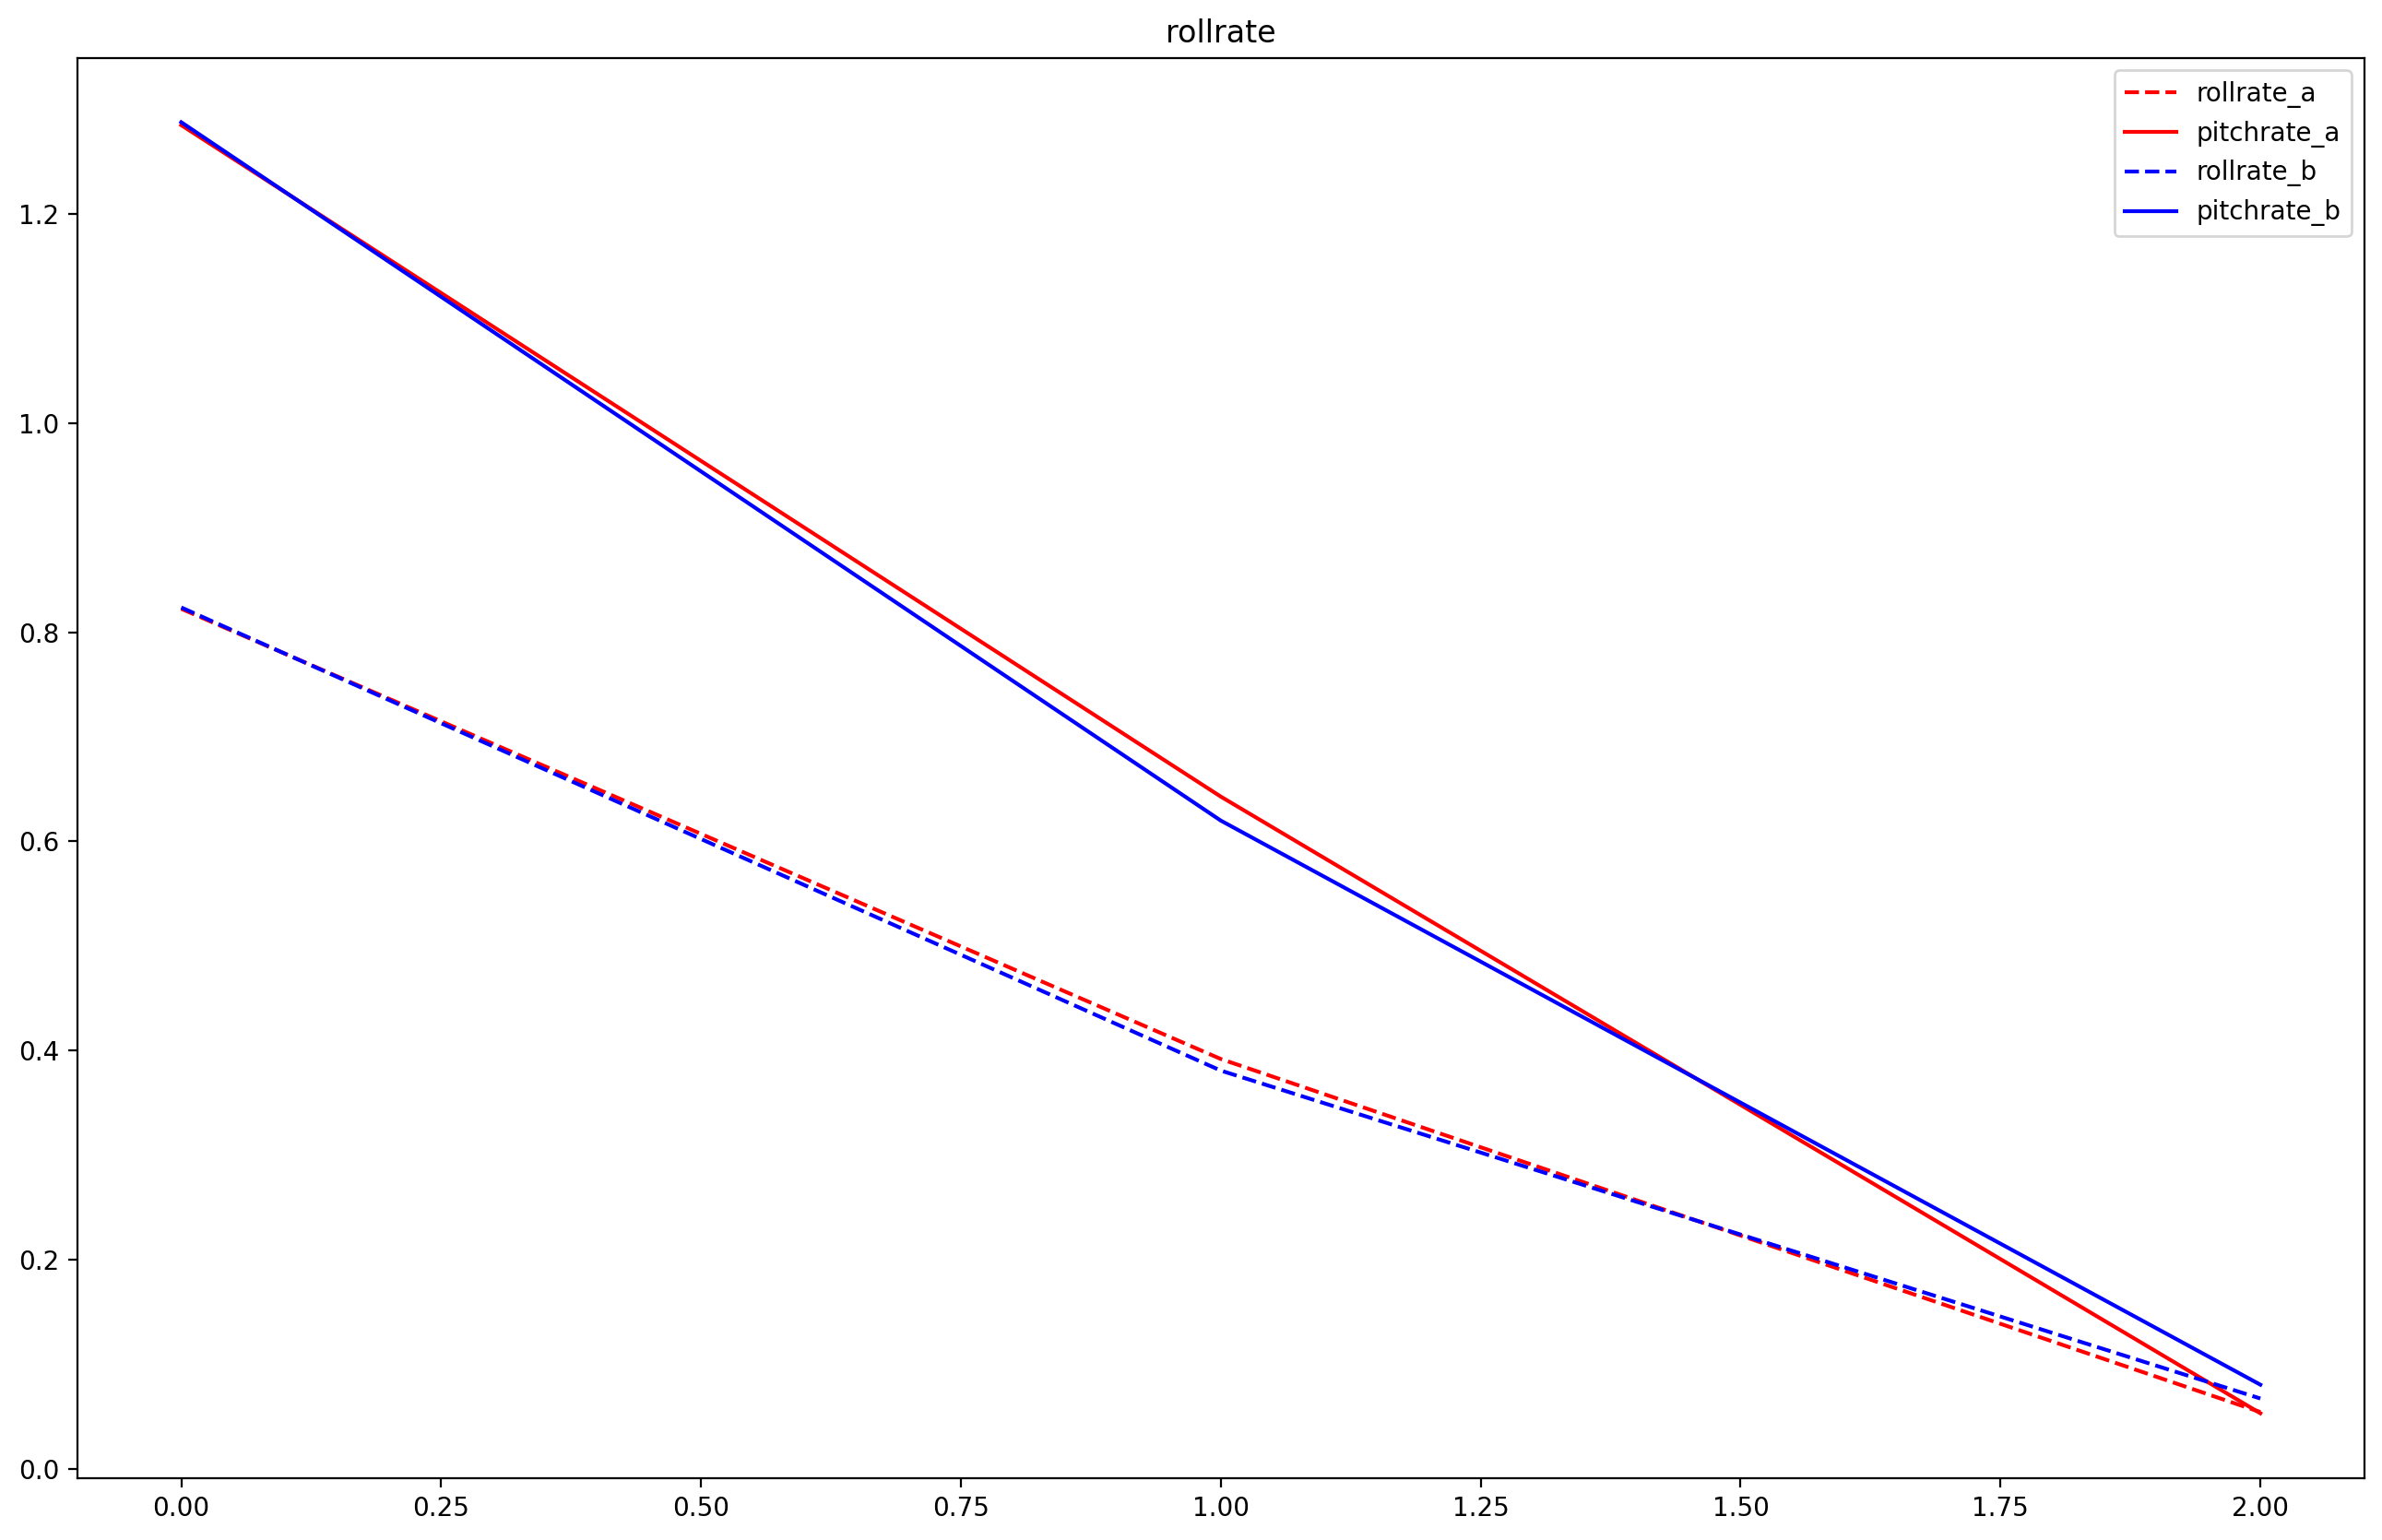

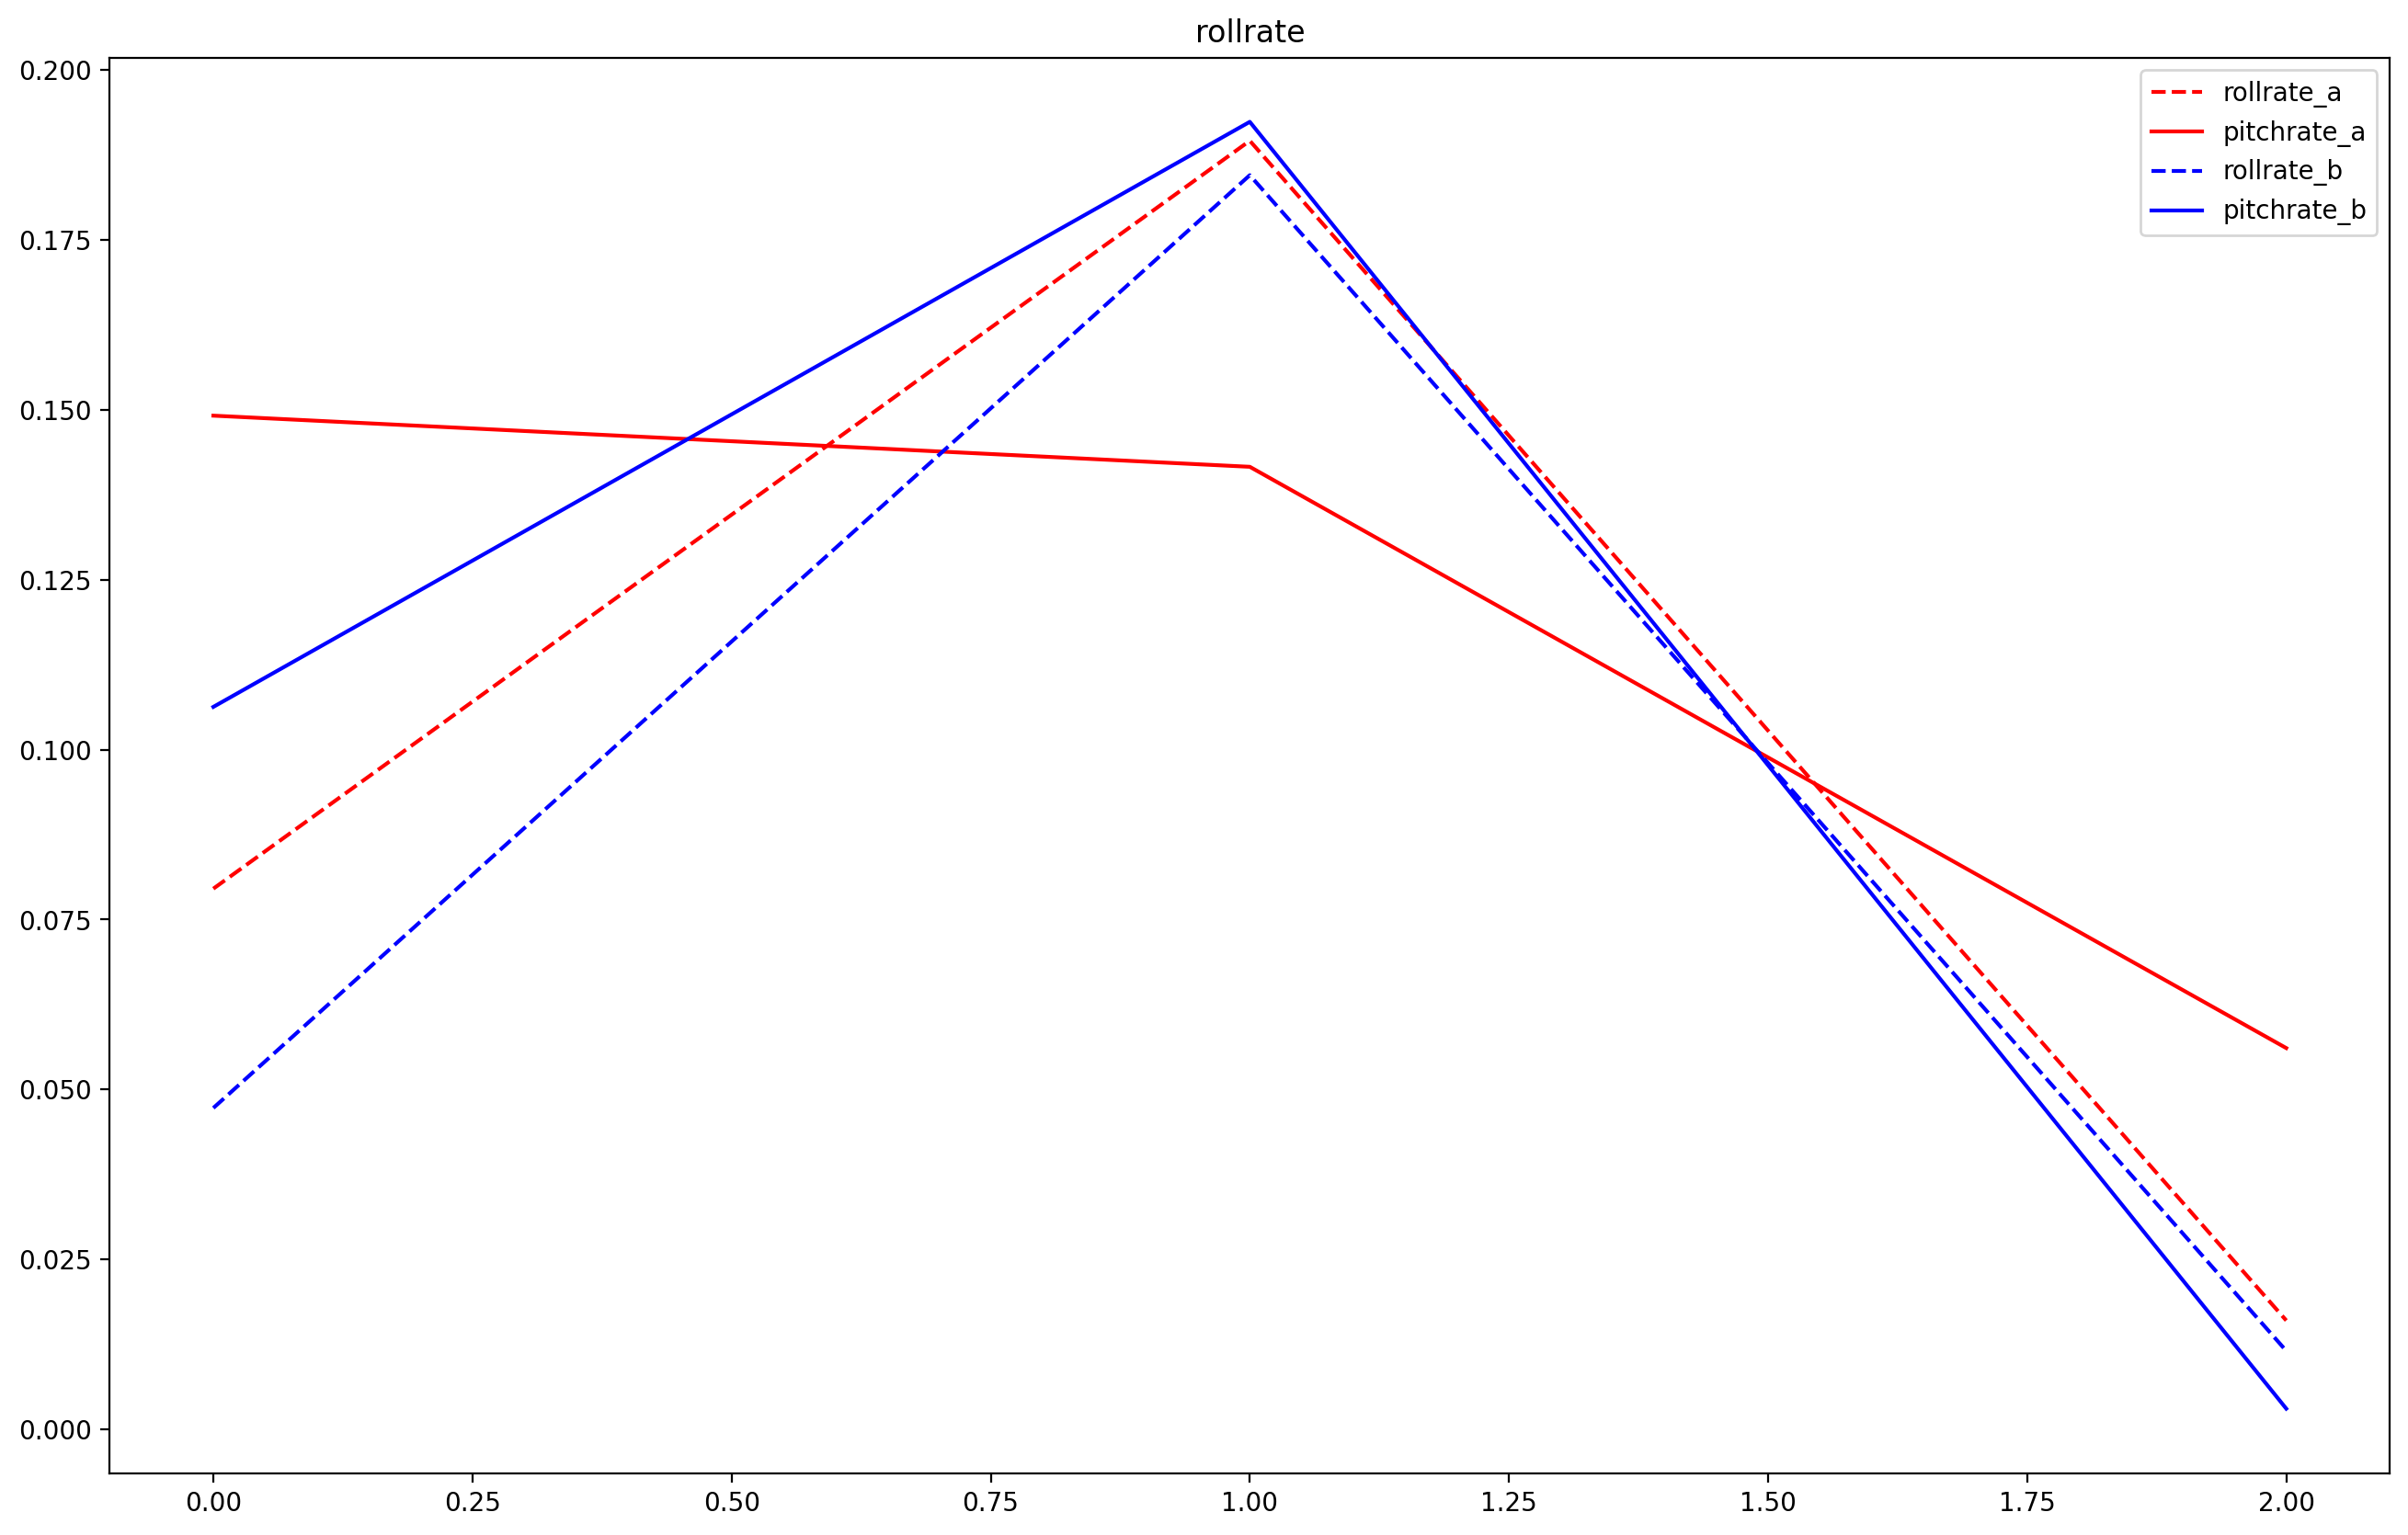

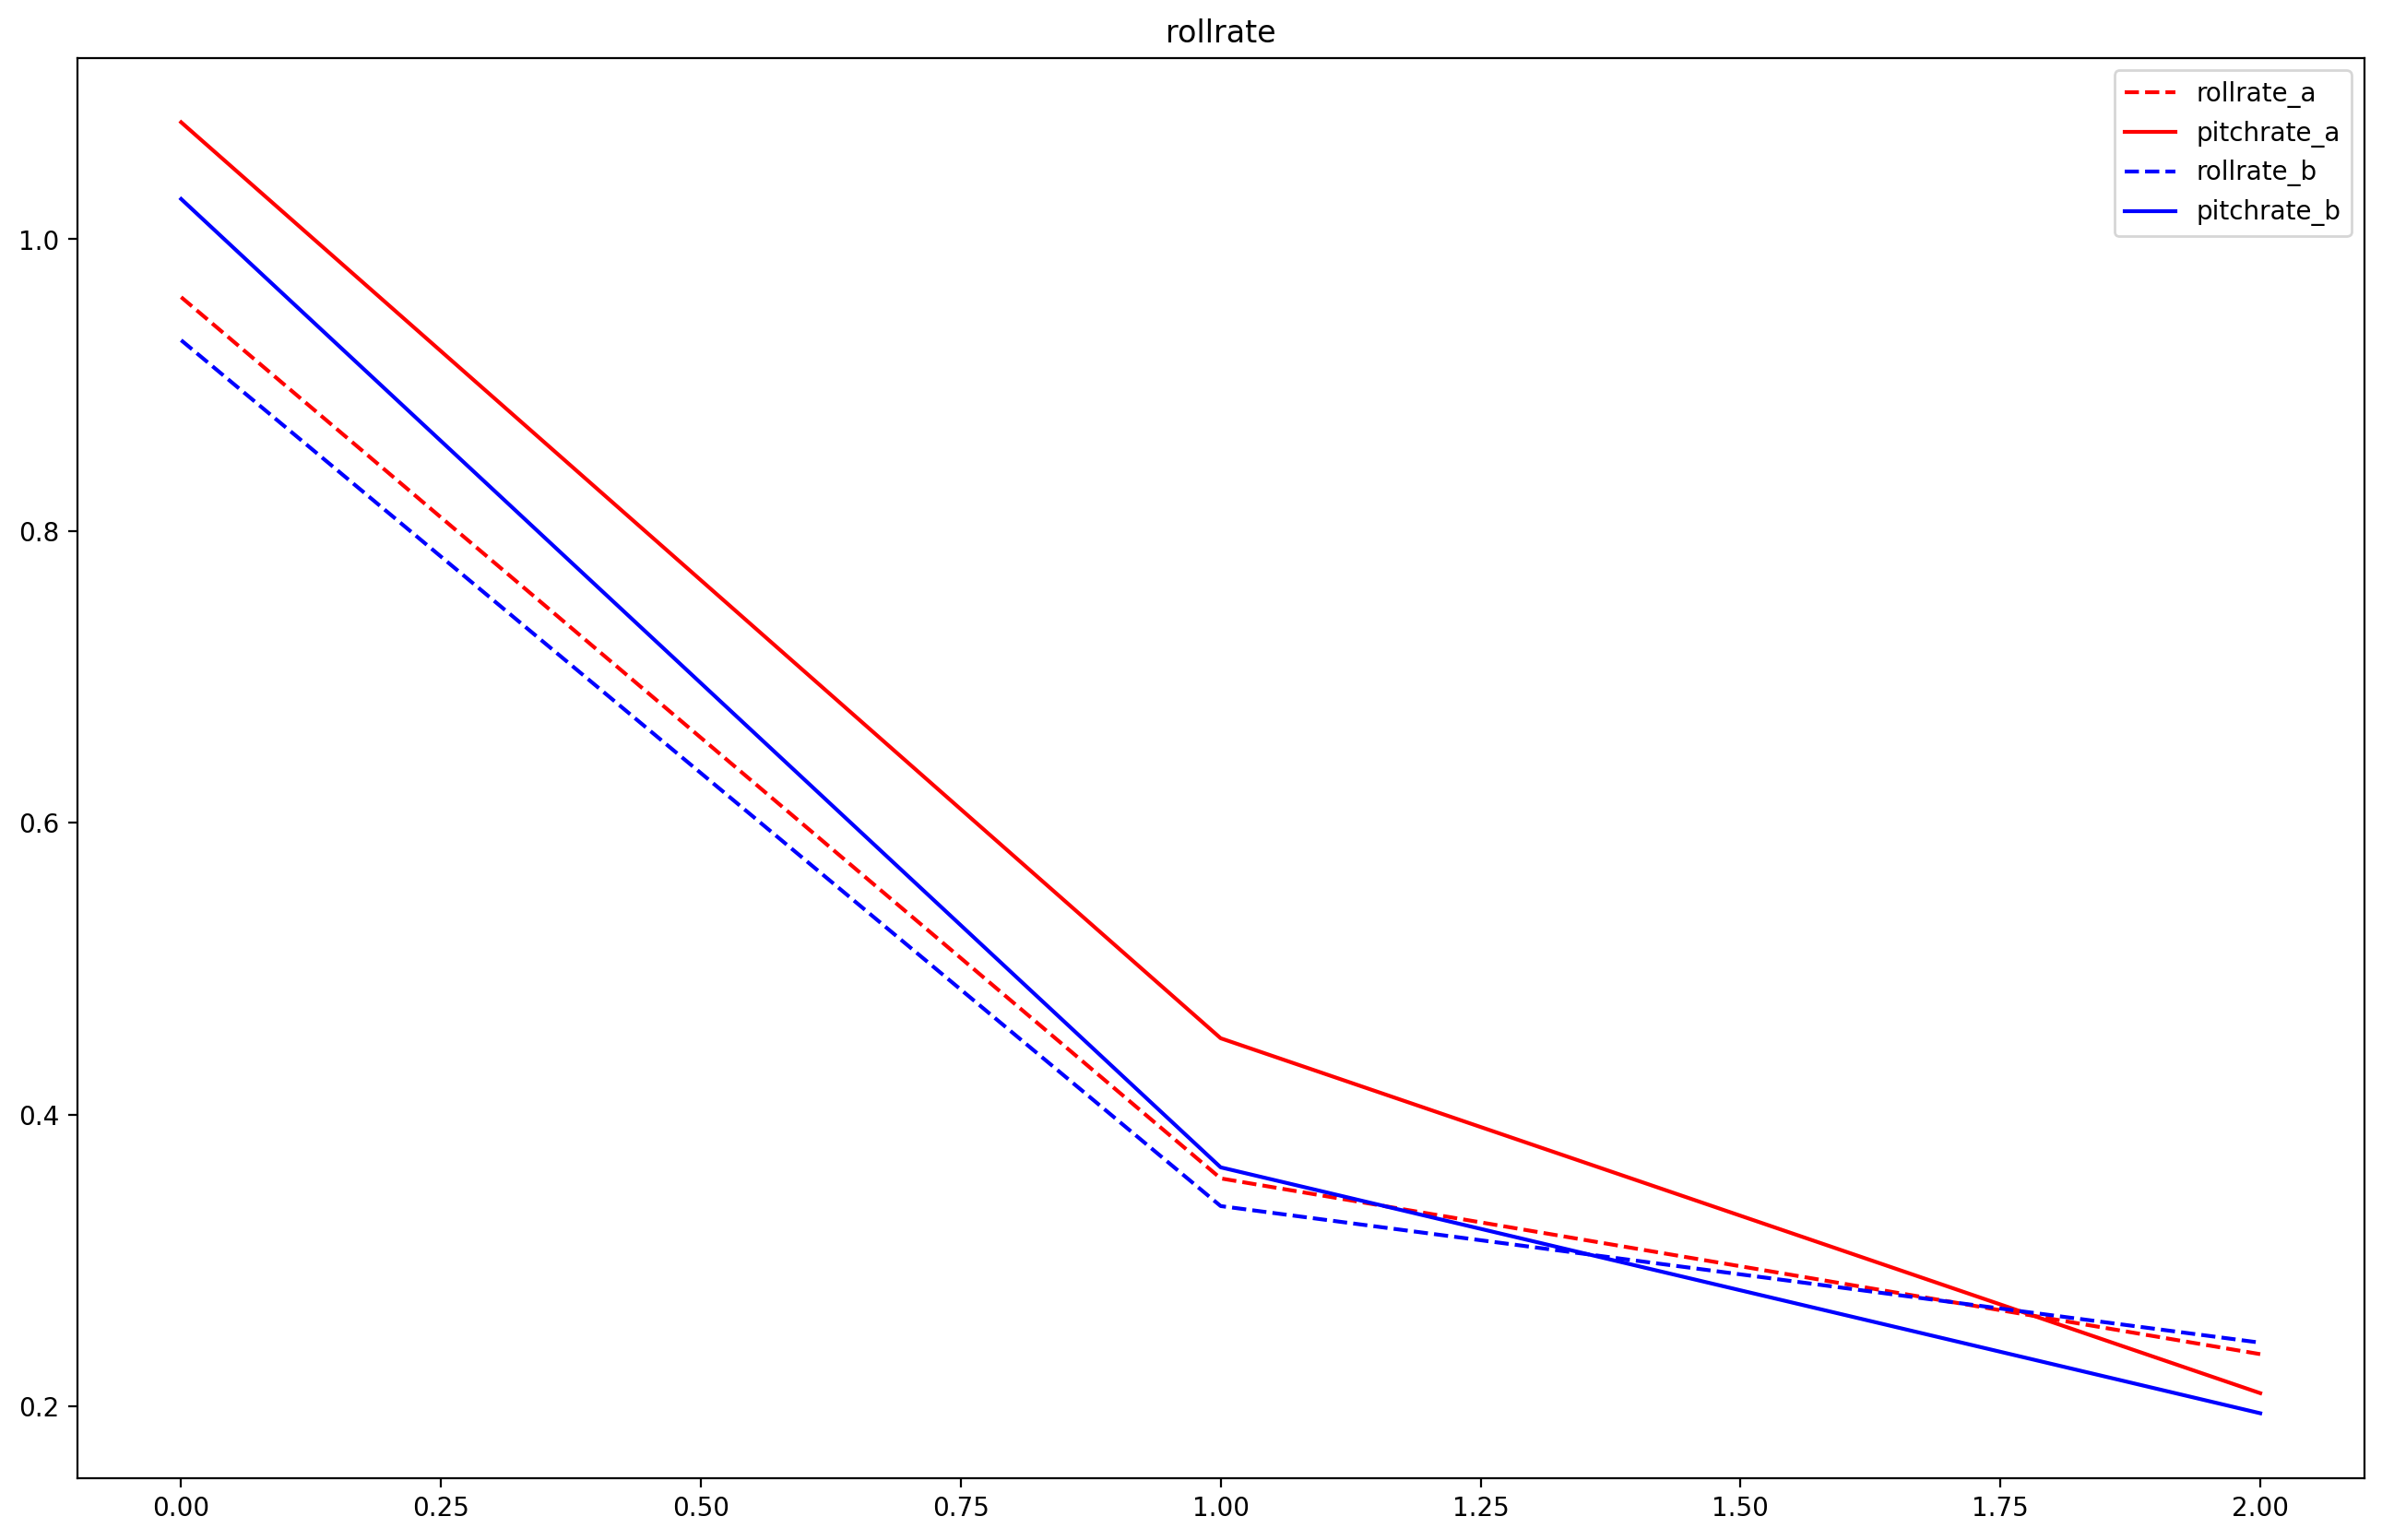

In [12]:
for i in range(states_a.shape[0]):
    fig = plt.figure(figsize=(16, 10), dpi=200)
    rollrate_a = states_a["omega"][i, 0].abs()
    rollrate_b = states_b["omega"][i, 0].abs()
    pitchrate_a = states_a["omega"][i, 1].abs()
    pitchrate_b = states_b["omega"][i, 1].abs()
    plt.plot(rollrate_a, "--", c="red", label="rollrate_a")
    plt.plot(pitchrate_a, c="red", label="pitchrate_a")
    plt.plot(rollrate_b, "--", c="blue", label="rollrate_b")
    plt.plot(pitchrate_b, c="blue", label="pitchrate_b")
    plt.legend()
    plt.title("rollrate")
    plt.show()

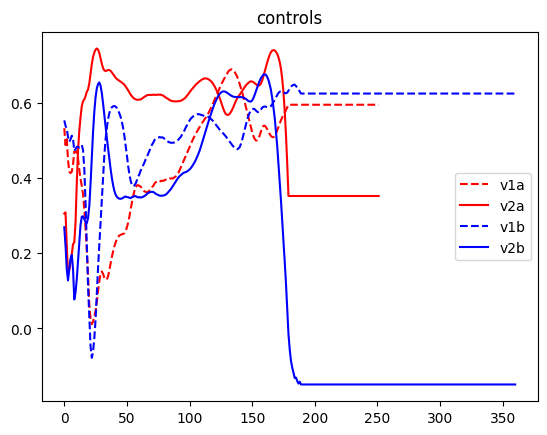

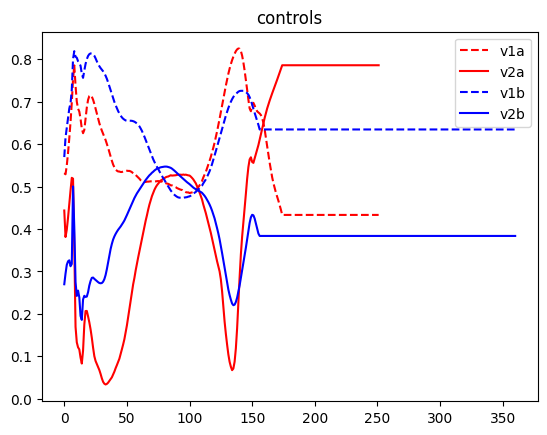

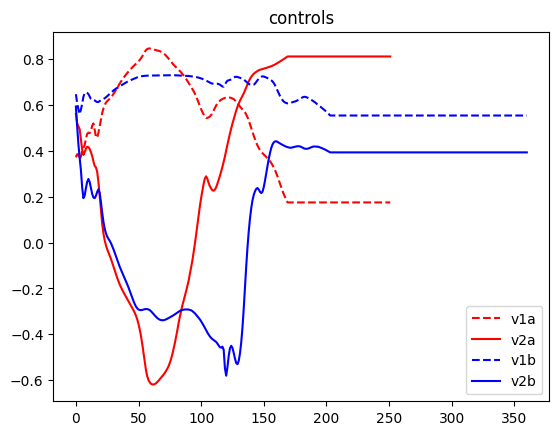

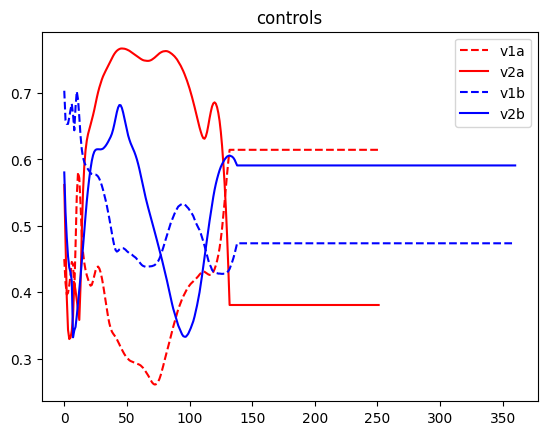

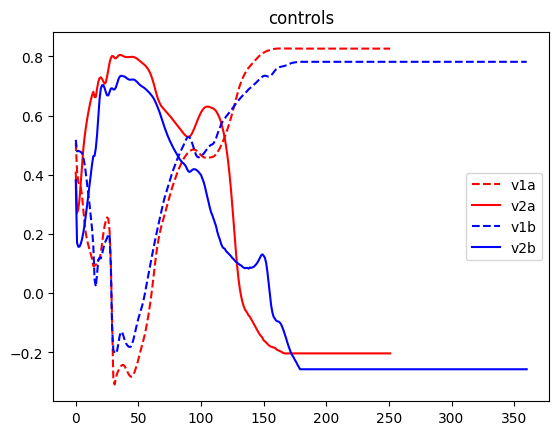

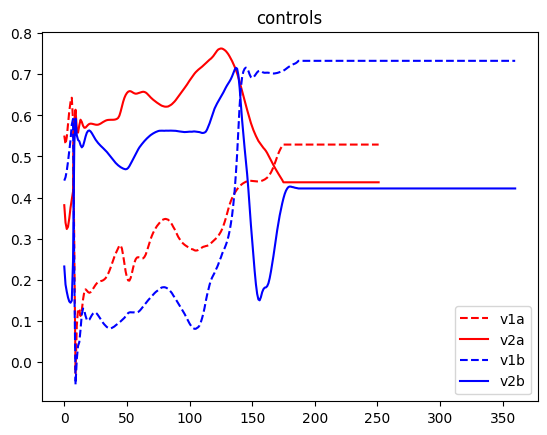

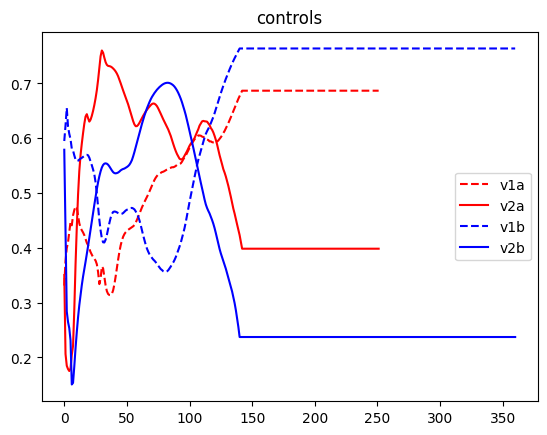

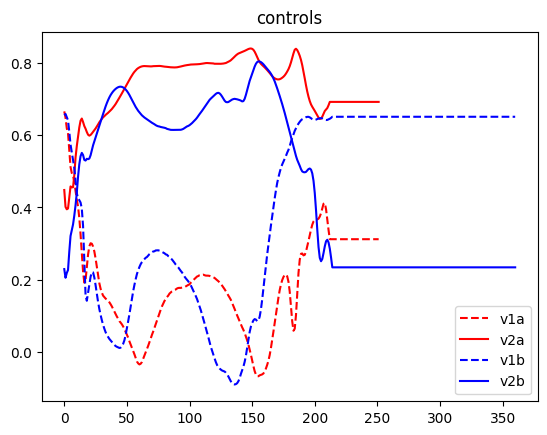

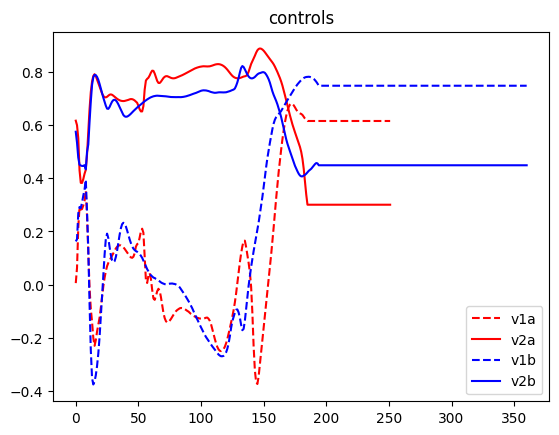

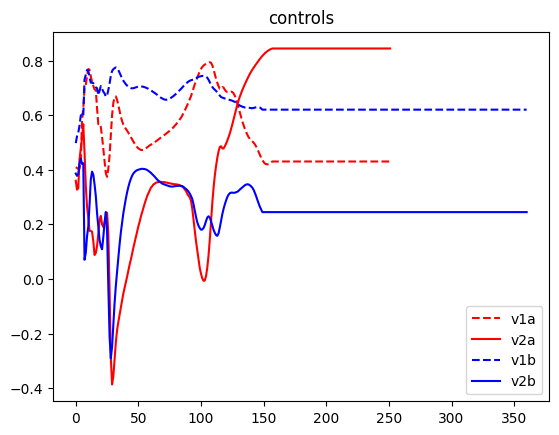

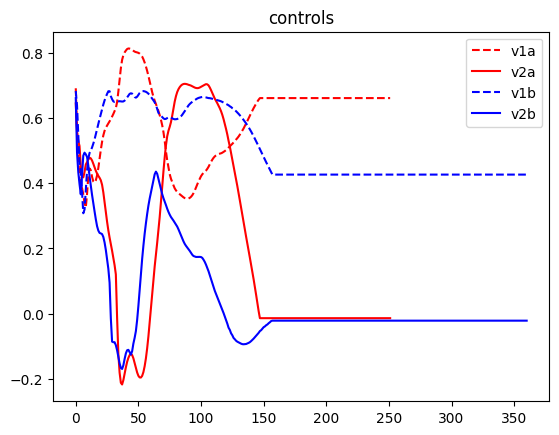

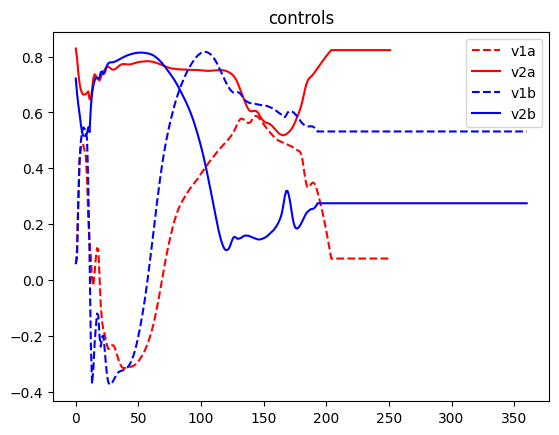

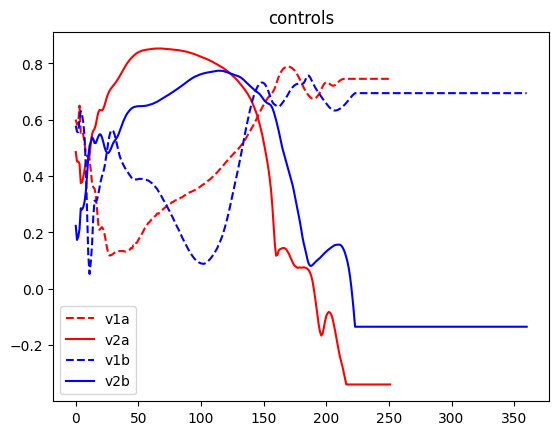

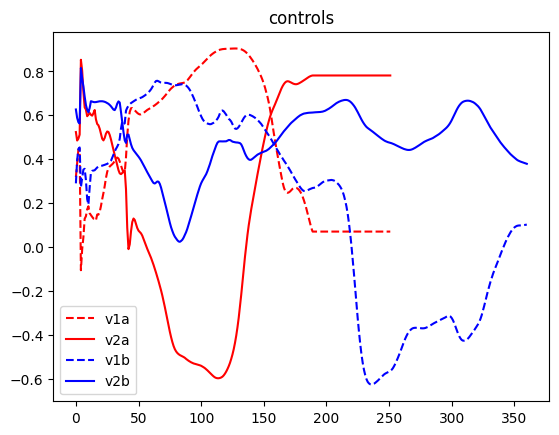

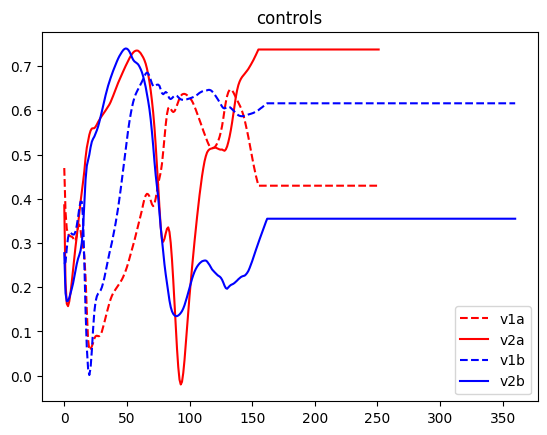

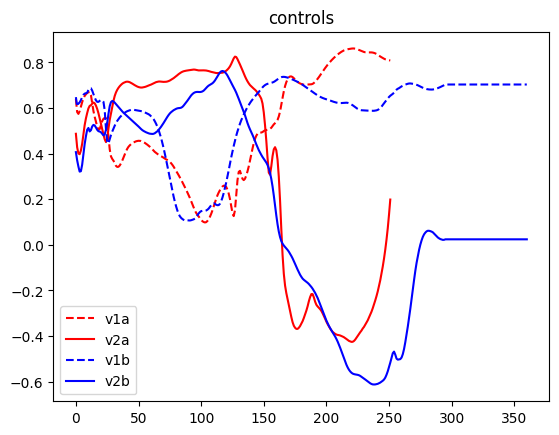

In [15]:
controls_a = rollout_a["action"]
controls_b = rollout_b["action"]
for i in range(controls_a.shape[0]):
    plt.plot(controls_a[i, :, 0], "--", c="red", label="v1a")
    plt.plot(controls_a[i, :, 1], c="red", label="v2a")
    plt.plot(controls_b[i, :, 0], "--", c="blue", label="v1b")
    plt.plot(controls_b[i, :, 1], c="blue", label="v2b")
    plt.legend()
    plt.title("controls")
    plt.show()